In [13]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

In [2]:
df_train = pd.read_csv("src/data/train.csv") 
df_test = pd.read_csv("src/data/test.csv")

df_train = df_train.dropna(axis=1)

In [3]:
df_train.isnull().sum()

ID                     0
COMPONENT_ARBITRARY    0
ANONYMOUS_1            0
YEAR                   0
SAMPLE_TRANSFER_DAY    0
ANONYMOUS_2            0
AG                     0
AL                     0
B                      0
BA                     0
BE                     0
CA                     0
CO                     0
CR                     0
CU                     0
FE                     0
H2O                    0
LI                     0
MG                     0
MN                     0
MO                     0
NA                     0
NI                     0
P                      0
PB                     0
PQINDEX                0
S                      0
SB                     0
SI                     0
SN                     0
TI                     0
V                      0
V40                    0
ZN                     0
Y_LABEL                0
dtype: int64

In [4]:
x = df_train.drop(['ID', 'Y_LABEL'], axis=1)
y = df_train['Y_LABEL']

scalar = StandardScaler()
le = LabelEncoder()

def get_values(value):
  return value.values.reshape(-1, 1)

categorical_features = ['COMPONENT_ARBITRARY','YEAR']
test_stage_features = ['COMPONENT_ARBITRARY', 'ANONYMOUS_1', 'YEAR' , 'ANONYMOUS_2', 'AG', 'CO', 'CR', 'CU', 'FE', 'H2O', 'MN', 'MO', 'NI', 'PQINDEX', 'TI', 'V', 'V40', 'ZN']
for col in x:
  if col not in categorical_features:
    x[col] = scalar.fit_transform(get_values(x[col]))

for col in categorical_features:
  x[col] = le.fit_transform(x[col])


In [5]:
x

,COMPONENT_ARBITRARY,ANONYMOUS_1,YEAR,SAMPLE_TRANSFER_DAY,ANONYMOUS_2,AG,AL,B,BA,BE,...,PB,PQINDEX,S,SB,SI,SN,TI,V,V40,ZN
0,2,-0.393763,4,-0.051413,-0.340760,-0.150214,-0.111628,0.281646,-0.238453,-0.041491,...,-0.160812,5.293270,1.001652,-0.174727,2.006643,0.302478,0.622282,-0.10655,0.899892,-0.966002
1,1,-0.426022,14,3.715319,-0.022576,-0.150214,-0.123127,-0.437686,-0.238453,-0.041491,...,0.033010,-0.259244,-1.170187,-0.174727,-0.179489,-0.252439,-0.102635,-0.10655,-1.317376,0.119147
2,1,-0.173409,8,-0.479451,-0.340760,-0.150214,1.118753,-0.612659,0.105735,-0.041491,...,-0.160812,-0.260552,-1.146917,-0.174727,-0.179489,0.025019,-0.102635,-0.10655,-0.740886,-0.332215
3,2,1.006399,3,-0.479451,-0.340760,-0.150214,-0.054133,-0.593217,-0.238453,-0.041491,...,-0.063901,-0.242884,1.044975,0.557916,-0.174370,0.025019,-0.102635,-0.10655,0.482642,-1.093888
4,2,0.191634,8,-0.308236,-0.340760,-0.150214,-0.134626,0.903771,-0.238453,-0.041491,...,-0.160812,-0.129674,0.690669,-0.174727,-0.169250,-0.252439,-0.102635,-0.10655,0.478611,-0.866326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14090,2,-0.362928,7,0.034194,-0.340760,-0.150214,-0.123127,1.331482,0.105735,-0.041491,...,-0.160812,-0.248773,1.069210,-0.174727,-0.169250,-0.252439,-0.102635,-0.10655,0.524972,-1.076961
14091,0,-0.085884,6,-0.479451,-0.340760,-0.150214,-0.111628,0.203880,-0.238453,-0.041491,...,-0.063901,-0.265787,-0.700817,-0.174727,-0.153891,-0.252439,-0.102635,-0.10655,0.164162,1.540935
14092,2,-0.322130,1,0.119802,0.295608,-0.150214,-0.077131,-0.622379,0.105735,-0.041491,...,-0.063901,0.150406,-0.256220,0.557916,-0.087334,-0.252439,-0.102635,-0.10655,-1.115806,1.339703
14093,1,-0.153722,2,0.975877,0.295608,-0.150214,-0.123127,-0.583497,-0.238453,-0.041491,...,-0.063901,-0.264479,-1.149169,-0.174727,-0.179489,-0.252439,-0.102635,-0.10655,-1.311328,0.119147


In [56]:
x_train, x_valid, y_train, y_valid = train_test_split(x,y, test_size=0.2, random_state=0)

In [57]:
x_train

,COMPONENT_ARBITRARY,ANONYMOUS_1,YEAR,SAMPLE_TRANSFER_DAY,ANONYMOUS_2,AG,AL,B,BA,BE,...,PB,PQINDEX,S,SB,SI,SN,TI,V,V40,ZN
7165,2,-0.363640,3,-0.222628,-0.340760,17.299740,-0.123127,-0.447407,-0.238453,-0.041491,...,0.033010,1.304753,0.204893,-0.174727,1.254040,0.025019,0.622282,-0.10655,0.865625,-0.979166
9055,1,-0.397796,10,-0.479451,-0.340760,-0.150214,-0.088630,-0.612659,0.105735,-0.041491,...,0.226831,-0.263824,-0.871858,-0.174727,-0.159010,0.025019,-0.102635,-0.10655,-1.029131,-0.097131
13046,2,0.118578,6,0.205410,-0.340760,-0.150214,-0.146124,-0.486290,-0.238453,-0.041491,...,-0.160812,-0.042640,0.145913,-0.174727,-0.148771,-0.252439,-0.102635,-0.10655,0.371779,-1.029945
11513,2,0.645625,10,0.034194,0.237425,-0.150214,-0.123127,0.242763,-0.238453,-0.041491,...,-0.160812,-0.218671,1.938889,-0.174727,-0.148771,-0.252439,-0.102635,-0.10655,0.393952,-1.044990
8426,2,-0.426022,10,-0.051413,0.162879,-0.150214,-0.054133,-0.622379,-0.238453,-0.041491,...,-0.160812,-0.104807,0.856884,-0.174727,-0.087334,-0.252439,-0.102635,-0.10655,0.780966,-1.076961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,0,-0.292007,11,0.034194,-0.022576,-0.150214,-0.100129,-0.573776,-0.238453,-0.041491,...,0.033010,-0.263170,-0.201529,-0.174727,-0.128292,0.302478,-0.102635,-0.10655,-0.238977,0.950404
3264,2,-0.411790,15,-0.479451,0.404699,-0.150214,-0.100129,0.534384,-0.238453,-0.041491,...,-0.160812,0.152369,-0.947566,0.924238,-0.071975,0.302478,-0.102635,-0.10655,-0.871906,1.587952
9845,0,-0.300309,4,0.205410,-0.340760,-0.150214,-0.134626,-0.554335,-0.238453,-0.041491,...,0.129920,-0.261207,-0.835505,-0.174727,-0.143651,-0.252439,-0.102635,-0.10655,0.204476,1.420572
10799,1,-0.011405,11,-0.393843,2.204710,-0.150214,-0.146124,-0.602938,-0.238453,-0.041491,...,-0.160812,-0.236994,-0.555192,-0.174727,-0.174370,-0.252439,-0.102635,-0.10655,-0.817483,-0.565418


In [ ]:
# https://zzinnam.tistory.com/entry/XGboost-%EC%A3%BC%EC%9A%94-%ED%95%98%EC%9D%B4%ED%8D%BC%ED%8C%8C%EB%9D%BC%EB%AF%B8%ED%84%B0-with-%ED%8C%8C%EC%9D%B4%EC%8D%AC

In [14]:
model = XGBClassifier()
model.fit(x_train, y_train, eval_set = [(x_valid, y_valid)])

y_pred = model.predict(x_valid)

accuracy_score(y_pred, y_valid)

[0]	validation_0-logloss:0.48016
[1]	validation_0-logloss:0.36532
[2]	validation_0-logloss:0.29438
[3]	validation_0-logloss:0.24820
[4]	validation_0-logloss:0.21880
[5]	validation_0-logloss:0.19852
[6]	validation_0-logloss:0.18492
[7]	validation_0-logloss:0.17481
[8]	validation_0-logloss:0.16906
[9]	validation_0-logloss:0.16375
[10]	validation_0-logloss:0.16067
[11]	validation_0-logloss:0.15891
[12]	validation_0-logloss:0.15771
[13]	validation_0-logloss:0.15640
[14]	validation_0-logloss:0.15665
[15]	validation_0-logloss:0.15659
[16]	validation_0-logloss:0.15669
[17]	validation_0-logloss:0.15603
[18]	validation_0-logloss:0.15559
[19]	validation_0-logloss:0.15601
[20]	validation_0-logloss:0.15606
[21]	validation_0-logloss:0.15618
[22]	validation_0-logloss:0.15598
[23]	validation_0-logloss:0.15638
[24]	validation_0-logloss:0.15722
[25]	validation_0-logloss:0.15748
[26]	validation_0-logloss:0.15753
[27]	validation_0-logloss:0.15756
[28]	validation_0-logloss:0.15719
[29]	validation_0-loglos

0.9528201489890032

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

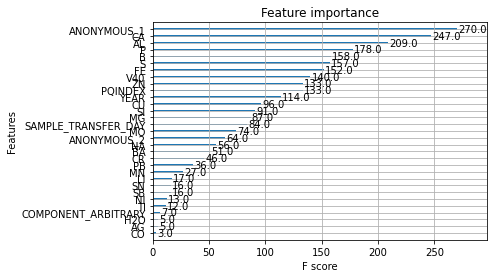

In [15]:
plot_importance(model)

In [26]:
params = {'n_estimators': [100,200,400,600,800,1000],
        'max_depth' : [3,4,6,8,10,12],
        'eta' : [0.1], 
        'objective' : ['binary:logistic']}

model_grid = GridSearchCV(model, param_grid=params, cv=3)
model_grid.fit(x_train, y_train, early_stopping_rounds=30, eval_metric='auc', eval_set = [(x_valid, y_valid)])





[0]	validation_0-auc:0.81353
[1]	validation_0-auc:0.81472
[2]	validation_0-auc:0.84056
[3]	validation_0-auc:0.84491
[4]	validation_0-auc:0.84885
[5]	validation_0-auc:0.85095
[6]	validation_0-auc:0.86231
[7]	validation_0-auc:0.86500
[8]	validation_0-auc:0.86736
[9]	validation_0-auc:0.86871
[10]	validation_0-auc:0.87201
[11]	validation_0-auc:0.87912
[12]	validation_0-auc:0.87963
[13]	validation_0-auc:0.87657
[14]	validation_0-auc:0.87797
[15]	validation_0-auc:0.88221
[16]	validation_0-auc:0.88495
[17]	validation_0-auc:0.88453
[18]	validation_0-auc:0.88801
[19]	validation_0-auc:0.88752
[20]	validation_0-auc:0.88830
[21]	validation_0-auc:0.88833
[22]	validation_0-auc:0.88697
[23]	validation_0-auc:0.88614
[24]	validation_0-auc:0.88795
[25]	validation_0-auc:0.88889


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-auc:0.88933
[27]	validation_0-auc:0.88818
[28]	validation_0-auc:0.88775
[29]	validation_0-auc:0.88787
[30]	validation_0-auc:0.88946
[31]	validation_0-auc:0.88907
[32]	validation_0-auc:0.88887
[33]	validation_0-auc:0.88885
[34]	validation_0-auc:0.88844
[35]	validation_0-auc:0.88807
[36]	validation_0-auc:0.88821
[37]	validation_0-auc:0.88755
[38]	validation_0-auc:0.88779
[39]	validation_0-auc:0.88750
[40]	validation_0-auc:0.88686
[41]	validation_0-auc:0.88671
[42]	validation_0-auc:0.88646
[43]	validation_0-auc:0.88700
[44]	validation_0-auc:0.88563
[45]	validation_0-auc:0.88603
[46]	validation_0-auc:0.88582
[47]	validation_0-auc:0.88550
[48]	validation_0-auc:0.88631
[49]	validation_0-auc:0.88601
[50]	validation_0-auc:0.88530
[51]	validation_0-auc:0.88551
[52]	validation_0-auc:0.88472
[53]	validation_0-auc:0.88435
[54]	validation_0-auc:0.88402
[55]	validation_0-auc:0.88436
[56]	validation_0-auc:0.88330
[57]	validation_0-auc:0.88287
[58]	validation_0-auc:0.88309
[59]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-auc:0.89212
[25]	validation_0-auc:0.89235
[26]	validation_0-auc:0.89215
[27]	validation_0-auc:0.89214
[28]	validation_0-auc:0.89015
[29]	validation_0-auc:0.89051
[30]	validation_0-auc:0.89232
[31]	validation_0-auc:0.89253
[32]	validation_0-auc:0.89237
[33]	validation_0-auc:0.89239
[34]	validation_0-auc:0.89178
[35]	validation_0-auc:0.89185
[36]	validation_0-auc:0.89083
[37]	validation_0-auc:0.89079
[38]	validation_0-auc:0.89193
[39]	validation_0-auc:0.89163
[40]	validation_0-auc:0.89275
[41]	validation_0-auc:0.89198
[42]	validation_0-auc:0.89209
[43]	validation_0-auc:0.89194
[44]	validation_0-auc:0.89196
[45]	validation_0-auc:0.89260
[46]	validation_0-auc:0.89341
[47]	validation_0-auc:0.89295
[48]	validation_0-auc:0.89192
[49]	validation_0-auc:0.89169
[50]	validation_0-auc:0.89177
[51]	validation_0-auc:0.89179
[52]	validation_0-auc:0.89197
[53]	validation_0-auc:0.89126
[0]	validation_0-auc:0.80052
[1]	validation_0-auc:0.82122
[2]	validation_0-auc:0.84076
[3]	validatio

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-auc:0.88155
[26]	validation_0-auc:0.88030
[27]	validation_0-auc:0.88082
[28]	validation_0-auc:0.88017
[29]	validation_0-auc:0.87986
[30]	validation_0-auc:0.87957
[31]	validation_0-auc:0.87837
[32]	validation_0-auc:0.87712
[33]	validation_0-auc:0.87535
[34]	validation_0-auc:0.87454
[35]	validation_0-auc:0.87779
[36]	validation_0-auc:0.87814
[37]	validation_0-auc:0.87881
[38]	validation_0-auc:0.87924
[39]	validation_0-auc:0.87988
[40]	validation_0-auc:0.88058
[41]	validation_0-auc:0.87971
[42]	validation_0-auc:0.87998
[43]	validation_0-auc:0.88085
[44]	validation_0-auc:0.88037
[45]	validation_0-auc:0.88034
[46]	validation_0-auc:0.87942
[0]	validation_0-auc:0.81353
[1]	validation_0-auc:0.81472
[2]	validation_0-auc:0.84056
[3]	validation_0-auc:0.84491
[4]	validation_0-auc:0.84885
[5]	validation_0-auc:0.85095
[6]	validation_0-auc:0.86231
[7]	validation_0-auc:0.86500
[8]	validation_0-auc:0.86736
[9]	validation_0-auc:0.86871
[10]	validation_0-auc:0.87201
[11]	validation_0-au

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-auc:0.88933
[27]	validation_0-auc:0.88818
[28]	validation_0-auc:0.88775
[29]	validation_0-auc:0.88787
[30]	validation_0-auc:0.88946
[31]	validation_0-auc:0.88907
[32]	validation_0-auc:0.88887
[33]	validation_0-auc:0.88885
[34]	validation_0-auc:0.88844
[35]	validation_0-auc:0.88807
[36]	validation_0-auc:0.88821
[37]	validation_0-auc:0.88755
[38]	validation_0-auc:0.88779
[39]	validation_0-auc:0.88750
[40]	validation_0-auc:0.88686
[41]	validation_0-auc:0.88671
[42]	validation_0-auc:0.88646
[43]	validation_0-auc:0.88700
[44]	validation_0-auc:0.88563
[45]	validation_0-auc:0.88603
[46]	validation_0-auc:0.88582
[47]	validation_0-auc:0.88550
[48]	validation_0-auc:0.88631
[49]	validation_0-auc:0.88601
[50]	validation_0-auc:0.88530
[51]	validation_0-auc:0.88551
[52]	validation_0-auc:0.88472
[53]	validation_0-auc:0.88435
[54]	validation_0-auc:0.88402
[55]	validation_0-auc:0.88436
[56]	validation_0-auc:0.88330
[57]	validation_0-auc:0.88287
[58]	validation_0-auc:0.88309
[59]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-auc:0.89232
[31]	validation_0-auc:0.89253
[32]	validation_0-auc:0.89237
[33]	validation_0-auc:0.89239
[34]	validation_0-auc:0.89178
[35]	validation_0-auc:0.89185
[36]	validation_0-auc:0.89083
[37]	validation_0-auc:0.89079
[38]	validation_0-auc:0.89193
[39]	validation_0-auc:0.89163
[40]	validation_0-auc:0.89275
[41]	validation_0-auc:0.89198
[42]	validation_0-auc:0.89209
[43]	validation_0-auc:0.89194
[44]	validation_0-auc:0.89196
[45]	validation_0-auc:0.89260
[46]	validation_0-auc:0.89341
[47]	validation_0-auc:0.89295
[48]	validation_0-auc:0.89192
[49]	validation_0-auc:0.89169
[50]	validation_0-auc:0.89177
[51]	validation_0-auc:0.89179
[52]	validation_0-auc:0.89197
[53]	validation_0-auc:0.89126
[0]	validation_0-auc:0.80052
[1]	validation_0-auc:0.82122
[2]	validation_0-auc:0.84076
[3]	validation_0-auc:0.83916
[4]	validation_0-auc:0.84594
[5]	validation_0-auc:0.84887
[6]	validation_0-auc:0.86360
[7]	validation_0-auc:0.86153
[8]	validation_0-auc:0.86640
[9]	validation_0-au

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-auc:0.87957
[31]	validation_0-auc:0.87837
[32]	validation_0-auc:0.87712
[33]	validation_0-auc:0.87535
[34]	validation_0-auc:0.87454
[35]	validation_0-auc:0.87779
[36]	validation_0-auc:0.87814
[37]	validation_0-auc:0.87881
[38]	validation_0-auc:0.87924
[39]	validation_0-auc:0.87988
[40]	validation_0-auc:0.88058
[41]	validation_0-auc:0.87971
[42]	validation_0-auc:0.87998
[43]	validation_0-auc:0.88085
[44]	validation_0-auc:0.88037
[45]	validation_0-auc:0.88034
[46]	validation_0-auc:0.87942
[47]	validation_0-auc:0.87981
[0]	validation_0-auc:0.81353
[1]	validation_0-auc:0.81472
[2]	validation_0-auc:0.84056
[3]	validation_0-auc:0.84491
[4]	validation_0-auc:0.84885
[5]	validation_0-auc:0.85095
[6]	validation_0-auc:0.86231
[7]	validation_0-auc:0.86500
[8]	validation_0-auc:0.86736
[9]	validation_0-auc:0.86871
[10]	validation_0-auc:0.87201
[11]	validation_0-auc:0.87912
[12]	validation_0-auc:0.87963
[13]	validation_0-auc:0.87657
[14]	validation_0-auc:0.87797
[15]	validation_0-au

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-auc:0.88795
[25]	validation_0-auc:0.88889
[26]	validation_0-auc:0.88933
[27]	validation_0-auc:0.88818
[28]	validation_0-auc:0.88775
[29]	validation_0-auc:0.88787
[30]	validation_0-auc:0.88946
[31]	validation_0-auc:0.88907
[32]	validation_0-auc:0.88887
[33]	validation_0-auc:0.88885
[34]	validation_0-auc:0.88844
[35]	validation_0-auc:0.88807
[36]	validation_0-auc:0.88821
[37]	validation_0-auc:0.88755
[38]	validation_0-auc:0.88779
[39]	validation_0-auc:0.88750
[40]	validation_0-auc:0.88686
[41]	validation_0-auc:0.88671
[42]	validation_0-auc:0.88646
[43]	validation_0-auc:0.88700
[44]	validation_0-auc:0.88563
[45]	validation_0-auc:0.88603
[46]	validation_0-auc:0.88582
[47]	validation_0-auc:0.88550
[48]	validation_0-auc:0.88631
[49]	validation_0-auc:0.88601
[50]	validation_0-auc:0.88530
[51]	validation_0-auc:0.88551
[52]	validation_0-auc:0.88472
[53]	validation_0-auc:0.88435
[54]	validation_0-auc:0.88402
[55]	validation_0-auc:0.88436
[56]	validation_0-auc:0.88330
[57]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-auc:0.89015
[29]	validation_0-auc:0.89051
[30]	validation_0-auc:0.89232
[31]	validation_0-auc:0.89253
[32]	validation_0-auc:0.89237
[33]	validation_0-auc:0.89239
[34]	validation_0-auc:0.89178
[35]	validation_0-auc:0.89185
[36]	validation_0-auc:0.89083
[37]	validation_0-auc:0.89079
[38]	validation_0-auc:0.89193
[39]	validation_0-auc:0.89163
[40]	validation_0-auc:0.89275
[41]	validation_0-auc:0.89198
[42]	validation_0-auc:0.89209
[43]	validation_0-auc:0.89194
[44]	validation_0-auc:0.89196
[45]	validation_0-auc:0.89260
[46]	validation_0-auc:0.89341
[47]	validation_0-auc:0.89295
[48]	validation_0-auc:0.89192
[49]	validation_0-auc:0.89169
[50]	validation_0-auc:0.89177
[51]	validation_0-auc:0.89179
[52]	validation_0-auc:0.89197
[0]	validation_0-auc:0.80052
[1]	validation_0-auc:0.82122
[2]	validation_0-auc:0.84076
[3]	validation_0-auc:0.83916
[4]	validation_0-auc:0.84594
[5]	validation_0-auc:0.84887
[6]	validation_0-auc:0.86360
[7]	validation_0-auc:0.86153
[8]	validation_0-a

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-auc:0.88017
[29]	validation_0-auc:0.87986
[30]	validation_0-auc:0.87957
[31]	validation_0-auc:0.87837
[32]	validation_0-auc:0.87712
[33]	validation_0-auc:0.87535
[34]	validation_0-auc:0.87454
[35]	validation_0-auc:0.87779
[36]	validation_0-auc:0.87814
[37]	validation_0-auc:0.87881
[38]	validation_0-auc:0.87924
[39]	validation_0-auc:0.87988
[40]	validation_0-auc:0.88058
[41]	validation_0-auc:0.87971
[42]	validation_0-auc:0.87998
[43]	validation_0-auc:0.88085
[44]	validation_0-auc:0.88037
[45]	validation_0-auc:0.88034
[46]	validation_0-auc:0.87942
[47]	validation_0-auc:0.87981
[0]	validation_0-auc:0.81353
[1]	validation_0-auc:0.81472
[2]	validation_0-auc:0.84056
[3]	validation_0-auc:0.84491
[4]	validation_0-auc:0.84885
[5]	validation_0-auc:0.85095
[6]	validation_0-auc:0.86231
[7]	validation_0-auc:0.86500
[8]	validation_0-auc:0.86736
[9]	validation_0-auc:0.86871
[10]	validation_0-auc:0.87201
[11]	validation_0-auc:0.87912
[12]	validation_0-auc:0.87963
[13]	validation_0-au

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-auc:0.88787
[30]	validation_0-auc:0.88946
[31]	validation_0-auc:0.88907
[32]	validation_0-auc:0.88887
[33]	validation_0-auc:0.88885
[34]	validation_0-auc:0.88844
[35]	validation_0-auc:0.88807
[36]	validation_0-auc:0.88821
[37]	validation_0-auc:0.88755
[38]	validation_0-auc:0.88779
[39]	validation_0-auc:0.88750
[40]	validation_0-auc:0.88686
[41]	validation_0-auc:0.88671
[42]	validation_0-auc:0.88646
[43]	validation_0-auc:0.88700
[44]	validation_0-auc:0.88563
[45]	validation_0-auc:0.88603
[46]	validation_0-auc:0.88582
[47]	validation_0-auc:0.88550
[48]	validation_0-auc:0.88631
[49]	validation_0-auc:0.88601
[50]	validation_0-auc:0.88530
[51]	validation_0-auc:0.88551
[52]	validation_0-auc:0.88472
[53]	validation_0-auc:0.88435
[54]	validation_0-auc:0.88402
[55]	validation_0-auc:0.88436
[56]	validation_0-auc:0.88330
[57]	validation_0-auc:0.88287
[58]	validation_0-auc:0.88309
[59]	validation_0-auc:0.88390
[0]	validation_0-auc:0.81339
[1]	validation_0-auc:0.81406
[2]	validati

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-auc:0.89235
[26]	validation_0-auc:0.89215
[27]	validation_0-auc:0.89214
[28]	validation_0-auc:0.89015
[29]	validation_0-auc:0.89051
[30]	validation_0-auc:0.89232
[31]	validation_0-auc:0.89253
[32]	validation_0-auc:0.89237
[33]	validation_0-auc:0.89239
[34]	validation_0-auc:0.89178
[35]	validation_0-auc:0.89185
[36]	validation_0-auc:0.89083
[37]	validation_0-auc:0.89079
[38]	validation_0-auc:0.89193
[39]	validation_0-auc:0.89163
[40]	validation_0-auc:0.89275
[41]	validation_0-auc:0.89198
[42]	validation_0-auc:0.89209
[43]	validation_0-auc:0.89194
[44]	validation_0-auc:0.89196
[45]	validation_0-auc:0.89260
[46]	validation_0-auc:0.89341
[47]	validation_0-auc:0.89295
[48]	validation_0-auc:0.89192
[49]	validation_0-auc:0.89169
[50]	validation_0-auc:0.89177
[51]	validation_0-auc:0.89179
[52]	validation_0-auc:0.89197
[0]	validation_0-auc:0.80052
[1]	validation_0-auc:0.82122
[2]	validation_0-auc:0.84076
[3]	validation_0-auc:0.83916
[4]	validation_0-auc:0.84594
[5]	validation_

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-auc:0.88082
[28]	validation_0-auc:0.88017
[29]	validation_0-auc:0.87986
[30]	validation_0-auc:0.87957
[31]	validation_0-auc:0.87837
[32]	validation_0-auc:0.87712
[33]	validation_0-auc:0.87535
[34]	validation_0-auc:0.87454
[35]	validation_0-auc:0.87779
[36]	validation_0-auc:0.87814
[37]	validation_0-auc:0.87881
[38]	validation_0-auc:0.87924
[39]	validation_0-auc:0.87988
[40]	validation_0-auc:0.88058
[41]	validation_0-auc:0.87971
[42]	validation_0-auc:0.87998
[43]	validation_0-auc:0.88085
[44]	validation_0-auc:0.88037
[45]	validation_0-auc:0.88034
[46]	validation_0-auc:0.87942
[47]	validation_0-auc:0.87981
[0]	validation_0-auc:0.81353
[1]	validation_0-auc:0.81472
[2]	validation_0-auc:0.84056
[3]	validation_0-auc:0.84491
[4]	validation_0-auc:0.84885
[5]	validation_0-auc:0.85095
[6]	validation_0-auc:0.86231
[7]	validation_0-auc:0.86500
[8]	validation_0-auc:0.86736
[9]	validation_0-auc:0.86871
[10]	validation_0-auc:0.87201
[11]	validation_0-auc:0.87912
[12]	validation_0-au

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-auc:0.88844
[35]	validation_0-auc:0.88807
[36]	validation_0-auc:0.88821
[37]	validation_0-auc:0.88755
[38]	validation_0-auc:0.88779
[39]	validation_0-auc:0.88750
[40]	validation_0-auc:0.88686
[41]	validation_0-auc:0.88671
[42]	validation_0-auc:0.88646
[43]	validation_0-auc:0.88700
[44]	validation_0-auc:0.88563
[45]	validation_0-auc:0.88603
[46]	validation_0-auc:0.88582
[47]	validation_0-auc:0.88550
[48]	validation_0-auc:0.88631
[49]	validation_0-auc:0.88601
[50]	validation_0-auc:0.88530
[51]	validation_0-auc:0.88551
[52]	validation_0-auc:0.88472
[53]	validation_0-auc:0.88435
[54]	validation_0-auc:0.88402
[55]	validation_0-auc:0.88436
[56]	validation_0-auc:0.88330
[57]	validation_0-auc:0.88287
[58]	validation_0-auc:0.88309
[59]	validation_0-auc:0.88390
[60]	validation_0-auc:0.88334
[0]	validation_0-auc:0.81339
[1]	validation_0-auc:0.81406
[2]	validation_0-auc:0.82994
[3]	validation_0-auc:0.83379
[4]	validation_0-auc:0.84128
[5]	validation_0-auc:0.85803
[6]	validation_0

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-auc:0.89051
[30]	validation_0-auc:0.89232
[31]	validation_0-auc:0.89253
[32]	validation_0-auc:0.89237
[33]	validation_0-auc:0.89239
[34]	validation_0-auc:0.89178
[35]	validation_0-auc:0.89185
[36]	validation_0-auc:0.89083
[37]	validation_0-auc:0.89079
[38]	validation_0-auc:0.89193
[39]	validation_0-auc:0.89163
[40]	validation_0-auc:0.89275
[41]	validation_0-auc:0.89198
[42]	validation_0-auc:0.89209
[43]	validation_0-auc:0.89194
[44]	validation_0-auc:0.89196
[45]	validation_0-auc:0.89260
[46]	validation_0-auc:0.89341
[47]	validation_0-auc:0.89295
[48]	validation_0-auc:0.89192
[49]	validation_0-auc:0.89169
[50]	validation_0-auc:0.89177
[51]	validation_0-auc:0.89179
[52]	validation_0-auc:0.89197
[0]	validation_0-auc:0.80052
[1]	validation_0-auc:0.82122
[2]	validation_0-auc:0.84076
[3]	validation_0-auc:0.83916
[4]	validation_0-auc:0.84594
[5]	validation_0-auc:0.84887
[6]	validation_0-auc:0.86360
[7]	validation_0-auc:0.86153
[8]	validation_0-auc:0.86640
[9]	validation_0-au

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-auc:0.88030
[27]	validation_0-auc:0.88082
[28]	validation_0-auc:0.88017
[29]	validation_0-auc:0.87986
[30]	validation_0-auc:0.87957
[31]	validation_0-auc:0.87837
[32]	validation_0-auc:0.87712
[33]	validation_0-auc:0.87535
[34]	validation_0-auc:0.87454
[35]	validation_0-auc:0.87779
[36]	validation_0-auc:0.87814
[37]	validation_0-auc:0.87881
[38]	validation_0-auc:0.87924
[39]	validation_0-auc:0.87988
[40]	validation_0-auc:0.88058
[41]	validation_0-auc:0.87971
[42]	validation_0-auc:0.87998
[43]	validation_0-auc:0.88085
[44]	validation_0-auc:0.88037
[45]	validation_0-auc:0.88034
[46]	validation_0-auc:0.87942
[47]	validation_0-auc:0.87981
[0]	validation_0-auc:0.81353
[1]	validation_0-auc:0.81472
[2]	validation_0-auc:0.84056
[3]	validation_0-auc:0.84491
[4]	validation_0-auc:0.84885
[5]	validation_0-auc:0.85095
[6]	validation_0-auc:0.86231
[7]	validation_0-auc:0.86500
[8]	validation_0-auc:0.86736
[9]	validation_0-auc:0.86871
[10]	validation_0-auc:0.87201
[11]	validation_0-au

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-auc:0.88933
[27]	validation_0-auc:0.88818
[28]	validation_0-auc:0.88775
[29]	validation_0-auc:0.88787
[30]	validation_0-auc:0.88946
[31]	validation_0-auc:0.88907
[32]	validation_0-auc:0.88887
[33]	validation_0-auc:0.88885
[34]	validation_0-auc:0.88844
[35]	validation_0-auc:0.88807
[36]	validation_0-auc:0.88821
[37]	validation_0-auc:0.88755
[38]	validation_0-auc:0.88779
[39]	validation_0-auc:0.88750
[40]	validation_0-auc:0.88686
[41]	validation_0-auc:0.88671
[42]	validation_0-auc:0.88646
[43]	validation_0-auc:0.88700
[44]	validation_0-auc:0.88563
[45]	validation_0-auc:0.88603
[46]	validation_0-auc:0.88582
[47]	validation_0-auc:0.88550
[48]	validation_0-auc:0.88631
[49]	validation_0-auc:0.88601
[50]	validation_0-auc:0.88530
[51]	validation_0-auc:0.88551
[52]	validation_0-auc:0.88472
[53]	validation_0-auc:0.88435
[54]	validation_0-auc:0.88402
[55]	validation_0-auc:0.88436
[56]	validation_0-auc:0.88330
[57]	validation_0-auc:0.88287
[58]	validation_0-auc:0.88309
[59]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-auc:0.89232
[31]	validation_0-auc:0.89253
[32]	validation_0-auc:0.89237
[33]	validation_0-auc:0.89239
[34]	validation_0-auc:0.89178
[35]	validation_0-auc:0.89185
[36]	validation_0-auc:0.89083
[37]	validation_0-auc:0.89079
[38]	validation_0-auc:0.89193
[39]	validation_0-auc:0.89163
[40]	validation_0-auc:0.89275
[41]	validation_0-auc:0.89198
[42]	validation_0-auc:0.89209
[43]	validation_0-auc:0.89194
[44]	validation_0-auc:0.89196
[45]	validation_0-auc:0.89260
[46]	validation_0-auc:0.89341
[47]	validation_0-auc:0.89295
[48]	validation_0-auc:0.89192
[49]	validation_0-auc:0.89169
[50]	validation_0-auc:0.89177
[51]	validation_0-auc:0.89179
[52]	validation_0-auc:0.89197
[53]	validation_0-auc:0.89126
[0]	validation_0-auc:0.80052
[1]	validation_0-auc:0.82122
[2]	validation_0-auc:0.84076
[3]	validation_0-auc:0.83916
[4]	validation_0-auc:0.84594
[5]	validation_0-auc:0.84887
[6]	validation_0-auc:0.86360
[7]	validation_0-auc:0.86153
[8]	validation_0-auc:0.86640
[9]	validation_0-au

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-auc:0.87712
[33]	validation_0-auc:0.87535
[34]	validation_0-auc:0.87454
[35]	validation_0-auc:0.87779
[36]	validation_0-auc:0.87814
[37]	validation_0-auc:0.87881
[38]	validation_0-auc:0.87924
[39]	validation_0-auc:0.87988
[40]	validation_0-auc:0.88058
[41]	validation_0-auc:0.87971
[42]	validation_0-auc:0.87998
[43]	validation_0-auc:0.88085
[44]	validation_0-auc:0.88037
[45]	validation_0-auc:0.88034
[46]	validation_0-auc:0.87942
[0]	validation_0-auc:0.81737
[1]	validation_0-auc:0.84152
[2]	validation_0-auc:0.85044
[3]	validation_0-auc:0.85107
[4]	validation_0-auc:0.86512
[5]	validation_0-auc:0.86303
[6]	validation_0-auc:0.86761
[7]	validation_0-auc:0.86919
[8]	validation_0-auc:0.86816
[9]	validation_0-auc:0.87048
[10]	validation_0-auc:0.87488
[11]	validation_0-auc:0.87428
[12]	validation_0-auc:0.87572
[13]	validation_0-auc:0.87651
[14]	validation_0-auc:0.87975
[15]	validation_0-auc:0.87879
[16]	validation_0-auc:0.88033


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-auc:0.87963
[18]	validation_0-auc:0.87882
[19]	validation_0-auc:0.87823
[20]	validation_0-auc:0.87767
[21]	validation_0-auc:0.87749
[22]	validation_0-auc:0.87810
[23]	validation_0-auc:0.88052
[24]	validation_0-auc:0.87992
[25]	validation_0-auc:0.88048
[26]	validation_0-auc:0.88018
[27]	validation_0-auc:0.87957
[28]	validation_0-auc:0.88166
[29]	validation_0-auc:0.88335
[30]	validation_0-auc:0.88311
[31]	validation_0-auc:0.88226
[32]	validation_0-auc:0.88230
[33]	validation_0-auc:0.88242
[34]	validation_0-auc:0.88196
[35]	validation_0-auc:0.88207
[36]	validation_0-auc:0.88423
[37]	validation_0-auc:0.88378
[38]	validation_0-auc:0.88506
[39]	validation_0-auc:0.88483
[40]	validation_0-auc:0.88427
[41]	validation_0-auc:0.88399
[42]	validation_0-auc:0.88352
[43]	validation_0-auc:0.88350
[44]	validation_0-auc:0.88373
[45]	validation_0-auc:0.88323
[46]	validation_0-auc:0.88272
[47]	validation_0-auc:0.88241
[48]	validation_0-auc:0.88254
[49]	validation_0-auc:0.88249
[50]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-auc:0.89219
[25]	validation_0-auc:0.89212
[26]	validation_0-auc:0.89205
[27]	validation_0-auc:0.89188
[28]	validation_0-auc:0.89328
[29]	validation_0-auc:0.89271
[30]	validation_0-auc:0.89286
[31]	validation_0-auc:0.89309
[32]	validation_0-auc:0.89322
[33]	validation_0-auc:0.89297
[34]	validation_0-auc:0.89270
[35]	validation_0-auc:0.89408
[36]	validation_0-auc:0.89486
[37]	validation_0-auc:0.89438
[38]	validation_0-auc:0.89420
[39]	validation_0-auc:0.89229
[40]	validation_0-auc:0.89179
[41]	validation_0-auc:0.89168
[42]	validation_0-auc:0.89176
[43]	validation_0-auc:0.88993
[44]	validation_0-auc:0.88889
[45]	validation_0-auc:0.88924
[46]	validation_0-auc:0.88868
[47]	validation_0-auc:0.88843
[0]	validation_0-auc:0.82800
[1]	validation_0-auc:0.83762
[2]	validation_0-auc:0.84173
[3]	validation_0-auc:0.84497
[4]	validation_0-auc:0.84742
[5]	validation_0-auc:0.85033
[6]	validation_0-auc:0.85153
[7]	validation_0-auc:0.86284
[8]	validation_0-auc:0.86534
[9]	validation_0-au

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-auc:0.88256
[25]	validation_0-auc:0.88253
[26]	validation_0-auc:0.88175
[27]	validation_0-auc:0.88285
[28]	validation_0-auc:0.88098
[29]	validation_0-auc:0.88102
[30]	validation_0-auc:0.88071
[31]	validation_0-auc:0.87852
[32]	validation_0-auc:0.87774
[33]	validation_0-auc:0.87858
[34]	validation_0-auc:0.87876
[35]	validation_0-auc:0.87950
[36]	validation_0-auc:0.88139
[37]	validation_0-auc:0.88234
[38]	validation_0-auc:0.88230
[39]	validation_0-auc:0.88176
[40]	validation_0-auc:0.88251
[41]	validation_0-auc:0.88157
[42]	validation_0-auc:0.88226
[43]	validation_0-auc:0.88220
[44]	validation_0-auc:0.88076
[45]	validation_0-auc:0.88105
[46]	validation_0-auc:0.88166
[47]	validation_0-auc:0.88132
[48]	validation_0-auc:0.88140
[0]	validation_0-auc:0.81737
[1]	validation_0-auc:0.84152
[2]	validation_0-auc:0.85044
[3]	validation_0-auc:0.85107
[4]	validation_0-auc:0.86512
[5]	validation_0-auc:0.86303
[6]	validation_0-auc:0.86761
[7]	validation_0-auc:0.86919
[8]	validation_0-a

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-auc:0.87992
[25]	validation_0-auc:0.88048
[26]	validation_0-auc:0.88018
[27]	validation_0-auc:0.87957
[28]	validation_0-auc:0.88166
[29]	validation_0-auc:0.88335
[30]	validation_0-auc:0.88311
[31]	validation_0-auc:0.88226
[32]	validation_0-auc:0.88230
[33]	validation_0-auc:0.88242
[34]	validation_0-auc:0.88196
[35]	validation_0-auc:0.88207
[36]	validation_0-auc:0.88423
[37]	validation_0-auc:0.88378
[38]	validation_0-auc:0.88506
[39]	validation_0-auc:0.88483
[40]	validation_0-auc:0.88427
[41]	validation_0-auc:0.88399
[42]	validation_0-auc:0.88352
[43]	validation_0-auc:0.88350
[44]	validation_0-auc:0.88373
[45]	validation_0-auc:0.88323
[46]	validation_0-auc:0.88272
[47]	validation_0-auc:0.88241
[48]	validation_0-auc:0.88254
[49]	validation_0-auc:0.88249
[50]	validation_0-auc:0.88204
[51]	validation_0-auc:0.88156
[52]	validation_0-auc:0.88173
[53]	validation_0-auc:0.88167
[54]	validation_0-auc:0.88072
[55]	validation_0-auc:0.88096
[56]	validation_0-auc:0.88133
[57]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-auc:0.89328
[29]	validation_0-auc:0.89271
[30]	validation_0-auc:0.89286
[31]	validation_0-auc:0.89309
[32]	validation_0-auc:0.89322
[33]	validation_0-auc:0.89297
[34]	validation_0-auc:0.89270
[35]	validation_0-auc:0.89408
[36]	validation_0-auc:0.89486
[37]	validation_0-auc:0.89438
[38]	validation_0-auc:0.89420
[39]	validation_0-auc:0.89229
[40]	validation_0-auc:0.89179
[41]	validation_0-auc:0.89168
[42]	validation_0-auc:0.89176
[43]	validation_0-auc:0.88993
[44]	validation_0-auc:0.88889
[45]	validation_0-auc:0.88924
[46]	validation_0-auc:0.88868
[0]	validation_0-auc:0.82800
[1]	validation_0-auc:0.83762
[2]	validation_0-auc:0.84173
[3]	validation_0-auc:0.84497
[4]	validation_0-auc:0.84742
[5]	validation_0-auc:0.85033
[6]	validation_0-auc:0.85153
[7]	validation_0-auc:0.86284
[8]	validation_0-auc:0.86534
[9]	validation_0-auc:0.86866
[10]	validation_0-auc:0.87305
[11]	validation_0-auc:0.87748
[12]	validation_0-auc:0.88008
[13]	validation_0-auc:0.88442
[14]	validation_0-au

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-auc:0.87852
[32]	validation_0-auc:0.87774
[33]	validation_0-auc:0.87858
[34]	validation_0-auc:0.87876
[35]	validation_0-auc:0.87950
[36]	validation_0-auc:0.88139
[37]	validation_0-auc:0.88234
[38]	validation_0-auc:0.88230
[39]	validation_0-auc:0.88176
[40]	validation_0-auc:0.88251
[41]	validation_0-auc:0.88157
[42]	validation_0-auc:0.88226
[43]	validation_0-auc:0.88220
[44]	validation_0-auc:0.88076
[45]	validation_0-auc:0.88105
[46]	validation_0-auc:0.88166
[47]	validation_0-auc:0.88132
[48]	validation_0-auc:0.88140
[49]	validation_0-auc:0.88065
[0]	validation_0-auc:0.81737
[1]	validation_0-auc:0.84152
[2]	validation_0-auc:0.85044
[3]	validation_0-auc:0.85107
[4]	validation_0-auc:0.86512
[5]	validation_0-auc:0.86303
[6]	validation_0-auc:0.86761
[7]	validation_0-auc:0.86919
[8]	validation_0-auc:0.86816
[9]	validation_0-auc:0.87048
[10]	validation_0-auc:0.87488
[11]	validation_0-auc:0.87428
[12]	validation_0-auc:0.87572
[13]	validation_0-auc:0.87651
[14]	validation_0-au

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-auc:0.88335
[30]	validation_0-auc:0.88311
[31]	validation_0-auc:0.88226
[32]	validation_0-auc:0.88230
[33]	validation_0-auc:0.88242
[34]	validation_0-auc:0.88196
[35]	validation_0-auc:0.88207
[36]	validation_0-auc:0.88423
[37]	validation_0-auc:0.88378
[38]	validation_0-auc:0.88506
[39]	validation_0-auc:0.88483
[40]	validation_0-auc:0.88427
[41]	validation_0-auc:0.88399
[42]	validation_0-auc:0.88352
[43]	validation_0-auc:0.88350
[44]	validation_0-auc:0.88373
[45]	validation_0-auc:0.88323
[46]	validation_0-auc:0.88272
[47]	validation_0-auc:0.88241
[48]	validation_0-auc:0.88254
[49]	validation_0-auc:0.88249
[50]	validation_0-auc:0.88204
[51]	validation_0-auc:0.88156
[52]	validation_0-auc:0.88173
[53]	validation_0-auc:0.88167
[54]	validation_0-auc:0.88072
[55]	validation_0-auc:0.88096
[56]	validation_0-auc:0.88133
[57]	validation_0-auc:0.88080
[58]	validation_0-auc:0.88005
[59]	validation_0-auc:0.88031
[60]	validation_0-auc:0.88051
[61]	validation_0-auc:0.88045
[62]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-auc:0.89219
[25]	validation_0-auc:0.89212
[26]	validation_0-auc:0.89205
[27]	validation_0-auc:0.89188
[28]	validation_0-auc:0.89328
[29]	validation_0-auc:0.89271
[30]	validation_0-auc:0.89286
[31]	validation_0-auc:0.89309
[32]	validation_0-auc:0.89322
[33]	validation_0-auc:0.89297
[34]	validation_0-auc:0.89270
[35]	validation_0-auc:0.89408
[36]	validation_0-auc:0.89486
[37]	validation_0-auc:0.89438
[38]	validation_0-auc:0.89420
[39]	validation_0-auc:0.89229
[40]	validation_0-auc:0.89179
[41]	validation_0-auc:0.89168
[42]	validation_0-auc:0.89176
[43]	validation_0-auc:0.88993
[44]	validation_0-auc:0.88889
[45]	validation_0-auc:0.88924
[46]	validation_0-auc:0.88868
[47]	validation_0-auc:0.88843
[0]	validation_0-auc:0.82800
[1]	validation_0-auc:0.83762
[2]	validation_0-auc:0.84173
[3]	validation_0-auc:0.84497
[4]	validation_0-auc:0.84742
[5]	validation_0-auc:0.85033
[6]	validation_0-auc:0.85153
[7]	validation_0-auc:0.86284
[8]	validation_0-auc:0.86534
[9]	validation_0-au

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-auc:0.88253
[26]	validation_0-auc:0.88175
[27]	validation_0-auc:0.88285
[28]	validation_0-auc:0.88098
[29]	validation_0-auc:0.88102
[30]	validation_0-auc:0.88071
[31]	validation_0-auc:0.87852
[32]	validation_0-auc:0.87774
[33]	validation_0-auc:0.87858
[34]	validation_0-auc:0.87876
[35]	validation_0-auc:0.87950
[36]	validation_0-auc:0.88139
[37]	validation_0-auc:0.88234
[38]	validation_0-auc:0.88230
[39]	validation_0-auc:0.88176
[40]	validation_0-auc:0.88251
[41]	validation_0-auc:0.88157
[42]	validation_0-auc:0.88226
[43]	validation_0-auc:0.88220
[44]	validation_0-auc:0.88076
[45]	validation_0-auc:0.88105
[46]	validation_0-auc:0.88166
[47]	validation_0-auc:0.88132
[48]	validation_0-auc:0.88140
[0]	validation_0-auc:0.81737
[1]	validation_0-auc:0.84152
[2]	validation_0-auc:0.85044
[3]	validation_0-auc:0.85107
[4]	validation_0-auc:0.86512
[5]	validation_0-auc:0.86303
[6]	validation_0-auc:0.86761
[7]	validation_0-auc:0.86919
[8]	validation_0-auc:0.86816
[9]	validation_0-au

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-auc:0.87957
[28]	validation_0-auc:0.88166
[29]	validation_0-auc:0.88335
[30]	validation_0-auc:0.88311
[31]	validation_0-auc:0.88226
[32]	validation_0-auc:0.88230
[33]	validation_0-auc:0.88242
[34]	validation_0-auc:0.88196
[35]	validation_0-auc:0.88207
[36]	validation_0-auc:0.88423
[37]	validation_0-auc:0.88378
[38]	validation_0-auc:0.88506
[39]	validation_0-auc:0.88483
[40]	validation_0-auc:0.88427
[41]	validation_0-auc:0.88399
[42]	validation_0-auc:0.88352
[43]	validation_0-auc:0.88350
[44]	validation_0-auc:0.88373
[45]	validation_0-auc:0.88323
[46]	validation_0-auc:0.88272
[47]	validation_0-auc:0.88241
[48]	validation_0-auc:0.88254
[49]	validation_0-auc:0.88249
[50]	validation_0-auc:0.88204
[51]	validation_0-auc:0.88156
[52]	validation_0-auc:0.88173
[53]	validation_0-auc:0.88167
[54]	validation_0-auc:0.88072
[55]	validation_0-auc:0.88096
[56]	validation_0-auc:0.88133
[57]	validation_0-auc:0.88080
[58]	validation_0-auc:0.88005
[59]	validation_0-auc:0.88031
[60]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-auc:0.89219
[25]	validation_0-auc:0.89212
[26]	validation_0-auc:0.89205
[27]	validation_0-auc:0.89188
[28]	validation_0-auc:0.89328
[29]	validation_0-auc:0.89271
[30]	validation_0-auc:0.89286
[31]	validation_0-auc:0.89309
[32]	validation_0-auc:0.89322
[33]	validation_0-auc:0.89297
[34]	validation_0-auc:0.89270
[35]	validation_0-auc:0.89408
[36]	validation_0-auc:0.89486
[37]	validation_0-auc:0.89438
[38]	validation_0-auc:0.89420
[39]	validation_0-auc:0.89229
[40]	validation_0-auc:0.89179
[41]	validation_0-auc:0.89168
[42]	validation_0-auc:0.89176
[43]	validation_0-auc:0.88993
[44]	validation_0-auc:0.88889
[45]	validation_0-auc:0.88924
[46]	validation_0-auc:0.88868
[47]	validation_0-auc:0.88843
[0]	validation_0-auc:0.82800
[1]	validation_0-auc:0.83762
[2]	validation_0-auc:0.84173
[3]	validation_0-auc:0.84497
[4]	validation_0-auc:0.84742
[5]	validation_0-auc:0.85033
[6]	validation_0-auc:0.85153
[7]	validation_0-auc:0.86284
[8]	validation_0-auc:0.86534
[9]	validation_0-au

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-auc:0.88285
[28]	validation_0-auc:0.88098
[29]	validation_0-auc:0.88102
[30]	validation_0-auc:0.88071
[31]	validation_0-auc:0.87852
[32]	validation_0-auc:0.87774
[33]	validation_0-auc:0.87858
[34]	validation_0-auc:0.87876
[35]	validation_0-auc:0.87950
[36]	validation_0-auc:0.88139
[37]	validation_0-auc:0.88234
[38]	validation_0-auc:0.88230
[39]	validation_0-auc:0.88176
[40]	validation_0-auc:0.88251
[41]	validation_0-auc:0.88157
[42]	validation_0-auc:0.88226
[43]	validation_0-auc:0.88220
[44]	validation_0-auc:0.88076
[45]	validation_0-auc:0.88105
[46]	validation_0-auc:0.88166
[47]	validation_0-auc:0.88132
[48]	validation_0-auc:0.88140
[49]	validation_0-auc:0.88065
[0]	validation_0-auc:0.81737
[1]	validation_0-auc:0.84152
[2]	validation_0-auc:0.85044
[3]	validation_0-auc:0.85107
[4]	validation_0-auc:0.86512
[5]	validation_0-auc:0.86303
[6]	validation_0-auc:0.86761
[7]	validation_0-auc:0.86919
[8]	validation_0-auc:0.86816
[9]	validation_0-auc:0.87048
[10]	validation_0-au

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-auc:0.88166
[29]	validation_0-auc:0.88335
[30]	validation_0-auc:0.88311
[31]	validation_0-auc:0.88226
[32]	validation_0-auc:0.88230
[33]	validation_0-auc:0.88242
[34]	validation_0-auc:0.88196
[35]	validation_0-auc:0.88207
[36]	validation_0-auc:0.88423
[37]	validation_0-auc:0.88378
[38]	validation_0-auc:0.88506
[39]	validation_0-auc:0.88483
[40]	validation_0-auc:0.88427
[41]	validation_0-auc:0.88399
[42]	validation_0-auc:0.88352
[43]	validation_0-auc:0.88350
[44]	validation_0-auc:0.88373
[45]	validation_0-auc:0.88323
[46]	validation_0-auc:0.88272
[47]	validation_0-auc:0.88241
[48]	validation_0-auc:0.88254
[49]	validation_0-auc:0.88249
[50]	validation_0-auc:0.88204
[51]	validation_0-auc:0.88156
[52]	validation_0-auc:0.88173
[53]	validation_0-auc:0.88167
[54]	validation_0-auc:0.88072
[55]	validation_0-auc:0.88096
[56]	validation_0-auc:0.88133
[57]	validation_0-auc:0.88080
[58]	validation_0-auc:0.88005
[59]	validation_0-auc:0.88031
[60]	validation_0-auc:0.88051
[61]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-auc:0.89212
[26]	validation_0-auc:0.89205
[27]	validation_0-auc:0.89188
[28]	validation_0-auc:0.89328
[29]	validation_0-auc:0.89271
[30]	validation_0-auc:0.89286
[31]	validation_0-auc:0.89309
[32]	validation_0-auc:0.89322
[33]	validation_0-auc:0.89297
[34]	validation_0-auc:0.89270
[35]	validation_0-auc:0.89408
[36]	validation_0-auc:0.89486
[37]	validation_0-auc:0.89438
[38]	validation_0-auc:0.89420
[39]	validation_0-auc:0.89229
[40]	validation_0-auc:0.89179
[41]	validation_0-auc:0.89168
[42]	validation_0-auc:0.89176
[43]	validation_0-auc:0.88993
[44]	validation_0-auc:0.88889
[45]	validation_0-auc:0.88924
[46]	validation_0-auc:0.88868
[0]	validation_0-auc:0.82800
[1]	validation_0-auc:0.83762
[2]	validation_0-auc:0.84173
[3]	validation_0-auc:0.84497
[4]	validation_0-auc:0.84742
[5]	validation_0-auc:0.85033
[6]	validation_0-auc:0.85153
[7]	validation_0-auc:0.86284
[8]	validation_0-auc:0.86534
[9]	validation_0-auc:0.86866
[10]	validation_0-auc:0.87305
[11]	validation_0-au

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-auc:0.88098
[29]	validation_0-auc:0.88102
[30]	validation_0-auc:0.88071
[31]	validation_0-auc:0.87852
[32]	validation_0-auc:0.87774
[33]	validation_0-auc:0.87858
[34]	validation_0-auc:0.87876
[35]	validation_0-auc:0.87950
[36]	validation_0-auc:0.88139
[37]	validation_0-auc:0.88234
[38]	validation_0-auc:0.88230
[39]	validation_0-auc:0.88176
[40]	validation_0-auc:0.88251
[41]	validation_0-auc:0.88157
[42]	validation_0-auc:0.88226
[43]	validation_0-auc:0.88220
[44]	validation_0-auc:0.88076
[45]	validation_0-auc:0.88105
[46]	validation_0-auc:0.88166
[47]	validation_0-auc:0.88132
[48]	validation_0-auc:0.88140
[49]	validation_0-auc:0.88065
[0]	validation_0-auc:0.81737
[1]	validation_0-auc:0.84152
[2]	validation_0-auc:0.85044
[3]	validation_0-auc:0.85107
[4]	validation_0-auc:0.86512
[5]	validation_0-auc:0.86303
[6]	validation_0-auc:0.86761
[7]	validation_0-auc:0.86919
[8]	validation_0-auc:0.86816
[9]	validation_0-auc:0.87048
[10]	validation_0-auc:0.87488
[11]	validation_0-au

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-auc:0.87957
[28]	validation_0-auc:0.88166
[29]	validation_0-auc:0.88335
[30]	validation_0-auc:0.88311
[31]	validation_0-auc:0.88226
[32]	validation_0-auc:0.88230
[33]	validation_0-auc:0.88242
[34]	validation_0-auc:0.88196
[35]	validation_0-auc:0.88207
[36]	validation_0-auc:0.88423
[37]	validation_0-auc:0.88378
[38]	validation_0-auc:0.88506
[39]	validation_0-auc:0.88483
[40]	validation_0-auc:0.88427
[41]	validation_0-auc:0.88399
[42]	validation_0-auc:0.88352
[43]	validation_0-auc:0.88350
[44]	validation_0-auc:0.88373
[45]	validation_0-auc:0.88323
[46]	validation_0-auc:0.88272
[47]	validation_0-auc:0.88241
[48]	validation_0-auc:0.88254
[49]	validation_0-auc:0.88249
[50]	validation_0-auc:0.88204
[51]	validation_0-auc:0.88156
[52]	validation_0-auc:0.88173
[53]	validation_0-auc:0.88167
[54]	validation_0-auc:0.88072
[55]	validation_0-auc:0.88096
[56]	validation_0-auc:0.88133
[57]	validation_0-auc:0.88080
[58]	validation_0-auc:0.88005
[59]	validation_0-auc:0.88031
[60]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-auc:0.89286
[31]	validation_0-auc:0.89309
[32]	validation_0-auc:0.89322
[33]	validation_0-auc:0.89297
[34]	validation_0-auc:0.89270
[35]	validation_0-auc:0.89408
[36]	validation_0-auc:0.89486
[37]	validation_0-auc:0.89438
[38]	validation_0-auc:0.89420
[39]	validation_0-auc:0.89229
[40]	validation_0-auc:0.89179
[41]	validation_0-auc:0.89168
[42]	validation_0-auc:0.89176
[43]	validation_0-auc:0.88993
[44]	validation_0-auc:0.88889
[45]	validation_0-auc:0.88924
[46]	validation_0-auc:0.88868
[47]	validation_0-auc:0.88843
[0]	validation_0-auc:0.82800
[1]	validation_0-auc:0.83762
[2]	validation_0-auc:0.84173
[3]	validation_0-auc:0.84497
[4]	validation_0-auc:0.84742
[5]	validation_0-auc:0.85033
[6]	validation_0-auc:0.85153
[7]	validation_0-auc:0.86284
[8]	validation_0-auc:0.86534
[9]	validation_0-auc:0.86866
[10]	validation_0-auc:0.87305
[11]	validation_0-auc:0.87748
[12]	validation_0-auc:0.88008
[13]	validation_0-auc:0.88442
[14]	validation_0-auc:0.88333
[15]	validation_0-au

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-auc:0.88102
[30]	validation_0-auc:0.88071
[31]	validation_0-auc:0.87852
[32]	validation_0-auc:0.87774
[33]	validation_0-auc:0.87858
[34]	validation_0-auc:0.87876
[35]	validation_0-auc:0.87950
[36]	validation_0-auc:0.88139
[37]	validation_0-auc:0.88234
[38]	validation_0-auc:0.88230
[39]	validation_0-auc:0.88176
[40]	validation_0-auc:0.88251
[41]	validation_0-auc:0.88157
[42]	validation_0-auc:0.88226
[43]	validation_0-auc:0.88220
[44]	validation_0-auc:0.88076
[45]	validation_0-auc:0.88105
[46]	validation_0-auc:0.88166
[47]	validation_0-auc:0.88132
[48]	validation_0-auc:0.88140
[0]	validation_0-auc:0.84135
[1]	validation_0-auc:0.85133
[2]	validation_0-auc:0.85232
[3]	validation_0-auc:0.85612
[4]	validation_0-auc:0.86065
[5]	validation_0-auc:0.86607
[6]	validation_0-auc:0.87496
[7]	validation_0-auc:0.87552
[8]	validation_0-auc:0.88182
[9]	validation_0-auc:0.87804
[10]	validation_0-auc:0.88135
[11]	validation_0-auc:0.88404
[12]	validation_0-auc:0.88645
[13]	validation_0-au

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-auc:0.88539
[23]	validation_0-auc:0.88483
[24]	validation_0-auc:0.88476
[25]	validation_0-auc:0.88412
[26]	validation_0-auc:0.88235
[27]	validation_0-auc:0.88302
[28]	validation_0-auc:0.88425
[29]	validation_0-auc:0.88375
[30]	validation_0-auc:0.88272
[31]	validation_0-auc:0.88225
[32]	validation_0-auc:0.88219
[33]	validation_0-auc:0.88213
[34]	validation_0-auc:0.88171
[35]	validation_0-auc:0.88129
[36]	validation_0-auc:0.87986
[37]	validation_0-auc:0.88011
[38]	validation_0-auc:0.88031
[39]	validation_0-auc:0.87955
[40]	validation_0-auc:0.87900
[41]	validation_0-auc:0.87852
[42]	validation_0-auc:0.87924
[43]	validation_0-auc:0.87869
[44]	validation_0-auc:0.87901
[45]	validation_0-auc:0.87906
[0]	validation_0-auc:0.82339
[1]	validation_0-auc:0.83247
[2]	validation_0-auc:0.83837
[3]	validation_0-auc:0.84985
[4]	validation_0-auc:0.85472
[5]	validation_0-auc:0.86252
[6]	validation_0-auc:0.87451
[7]	validation_0-auc:0.88053
[8]	validation_0-auc:0.88578
[9]	validation_0-au

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-auc:0.88653
[23]	validation_0-auc:0.88642
[24]	validation_0-auc:0.88718
[25]	validation_0-auc:0.88806
[26]	validation_0-auc:0.88636
[27]	validation_0-auc:0.88560
[28]	validation_0-auc:0.88768
[29]	validation_0-auc:0.88695
[30]	validation_0-auc:0.88701
[31]	validation_0-auc:0.88733
[32]	validation_0-auc:0.88759
[33]	validation_0-auc:0.88663
[34]	validation_0-auc:0.88700
[35]	validation_0-auc:0.88592
[36]	validation_0-auc:0.88583
[37]	validation_0-auc:0.88597
[38]	validation_0-auc:0.88509
[39]	validation_0-auc:0.88400
[40]	validation_0-auc:0.88359
[41]	validation_0-auc:0.88424
[0]	validation_0-auc:0.83969
[1]	validation_0-auc:0.84679
[2]	validation_0-auc:0.84882
[3]	validation_0-auc:0.85215
[4]	validation_0-auc:0.85668
[5]	validation_0-auc:0.86069
[6]	validation_0-auc:0.86079
[7]	validation_0-auc:0.86587
[8]	validation_0-auc:0.86896
[9]	validation_0-auc:0.87315
[10]	validation_0-auc:0.88294
[11]	validation_0-auc:0.88150
[12]	validation_0-auc:0.87827
[13]	validation_0-au

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-auc:0.88520
[24]	validation_0-auc:0.88460
[25]	validation_0-auc:0.88371
[26]	validation_0-auc:0.88341
[27]	validation_0-auc:0.88295
[28]	validation_0-auc:0.88323
[29]	validation_0-auc:0.88200
[30]	validation_0-auc:0.88114
[31]	validation_0-auc:0.88002
[32]	validation_0-auc:0.88077
[33]	validation_0-auc:0.87930
[34]	validation_0-auc:0.88030
[35]	validation_0-auc:0.88245
[36]	validation_0-auc:0.88274
[37]	validation_0-auc:0.88100
[38]	validation_0-auc:0.88000
[39]	validation_0-auc:0.88006
[40]	validation_0-auc:0.88052
[41]	validation_0-auc:0.87881
[42]	validation_0-auc:0.87870
[43]	validation_0-auc:0.88040
[44]	validation_0-auc:0.88066
[45]	validation_0-auc:0.88160
[46]	validation_0-auc:0.88260
[47]	validation_0-auc:0.88224
[48]	validation_0-auc:0.88089
[49]	validation_0-auc:0.88010
[50]	validation_0-auc:0.88086
[51]	validation_0-auc:0.88013
[52]	validation_0-auc:0.88002
[0]	validation_0-auc:0.84135
[1]	validation_0-auc:0.85133
[2]	validation_0-auc:0.85232
[3]	validatio

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-auc:0.88539
[23]	validation_0-auc:0.88483
[24]	validation_0-auc:0.88476
[25]	validation_0-auc:0.88412
[26]	validation_0-auc:0.88235
[27]	validation_0-auc:0.88302
[28]	validation_0-auc:0.88425
[29]	validation_0-auc:0.88375
[30]	validation_0-auc:0.88272
[31]	validation_0-auc:0.88225
[32]	validation_0-auc:0.88219
[33]	validation_0-auc:0.88213
[34]	validation_0-auc:0.88171
[35]	validation_0-auc:0.88129
[36]	validation_0-auc:0.87986
[37]	validation_0-auc:0.88011
[38]	validation_0-auc:0.88031
[39]	validation_0-auc:0.87955
[40]	validation_0-auc:0.87900
[41]	validation_0-auc:0.87852
[42]	validation_0-auc:0.87924
[43]	validation_0-auc:0.87869
[44]	validation_0-auc:0.87901
[0]	validation_0-auc:0.82339
[1]	validation_0-auc:0.83247
[2]	validation_0-auc:0.83837
[3]	validation_0-auc:0.84985
[4]	validation_0-auc:0.85472
[5]	validation_0-auc:0.86252
[6]	validation_0-auc:0.87451
[7]	validation_0-auc:0.88053
[8]	validation_0-auc:0.88578
[9]	validation_0-auc:0.88993
[10]	validation_0-au

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-auc:0.88808
[19]	validation_0-auc:0.88820
[20]	validation_0-auc:0.88721
[21]	validation_0-auc:0.88653
[22]	validation_0-auc:0.88653
[23]	validation_0-auc:0.88642
[24]	validation_0-auc:0.88718
[25]	validation_0-auc:0.88806
[26]	validation_0-auc:0.88636
[27]	validation_0-auc:0.88560
[28]	validation_0-auc:0.88768
[29]	validation_0-auc:0.88695
[30]	validation_0-auc:0.88701
[31]	validation_0-auc:0.88733
[32]	validation_0-auc:0.88759
[33]	validation_0-auc:0.88663
[34]	validation_0-auc:0.88700
[35]	validation_0-auc:0.88592
[36]	validation_0-auc:0.88583
[37]	validation_0-auc:0.88597
[38]	validation_0-auc:0.88509
[39]	validation_0-auc:0.88400
[40]	validation_0-auc:0.88359
[41]	validation_0-auc:0.88424
[42]	validation_0-auc:0.88429
[0]	validation_0-auc:0.83969
[1]	validation_0-auc:0.84679
[2]	validation_0-auc:0.84882
[3]	validation_0-auc:0.85215
[4]	validation_0-auc:0.85668
[5]	validation_0-auc:0.86069
[6]	validation_0-auc:0.86079
[7]	validation_0-auc:0.86587
[8]	validation_0-a

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-auc:0.88301
[22]	validation_0-auc:0.88603
[23]	validation_0-auc:0.88520
[24]	validation_0-auc:0.88460
[25]	validation_0-auc:0.88371
[26]	validation_0-auc:0.88341
[27]	validation_0-auc:0.88295
[28]	validation_0-auc:0.88323
[29]	validation_0-auc:0.88200
[30]	validation_0-auc:0.88114
[31]	validation_0-auc:0.88002
[32]	validation_0-auc:0.88077
[33]	validation_0-auc:0.87930
[34]	validation_0-auc:0.88030
[35]	validation_0-auc:0.88245
[36]	validation_0-auc:0.88274
[37]	validation_0-auc:0.88100
[38]	validation_0-auc:0.88000
[39]	validation_0-auc:0.88006
[40]	validation_0-auc:0.88052
[41]	validation_0-auc:0.87881
[42]	validation_0-auc:0.87870
[43]	validation_0-auc:0.88040
[44]	validation_0-auc:0.88066
[45]	validation_0-auc:0.88160
[46]	validation_0-auc:0.88260
[47]	validation_0-auc:0.88224
[48]	validation_0-auc:0.88089
[49]	validation_0-auc:0.88010
[50]	validation_0-auc:0.88086
[51]	validation_0-auc:0.88013
[52]	validation_0-auc:0.88002
[0]	validation_0-auc:0.84135
[1]	validat

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-auc:0.88412
[26]	validation_0-auc:0.88235
[27]	validation_0-auc:0.88302
[28]	validation_0-auc:0.88425
[29]	validation_0-auc:0.88375
[30]	validation_0-auc:0.88272
[31]	validation_0-auc:0.88225
[32]	validation_0-auc:0.88219
[33]	validation_0-auc:0.88213
[34]	validation_0-auc:0.88171
[35]	validation_0-auc:0.88129
[36]	validation_0-auc:0.87986
[37]	validation_0-auc:0.88011
[38]	validation_0-auc:0.88031
[39]	validation_0-auc:0.87955
[40]	validation_0-auc:0.87900
[41]	validation_0-auc:0.87852
[42]	validation_0-auc:0.87924
[43]	validation_0-auc:0.87869
[44]	validation_0-auc:0.87901
[45]	validation_0-auc:0.87906
[0]	validation_0-auc:0.82339
[1]	validation_0-auc:0.83247
[2]	validation_0-auc:0.83837
[3]	validation_0-auc:0.84985
[4]	validation_0-auc:0.85472
[5]	validation_0-auc:0.86252
[6]	validation_0-auc:0.87451
[7]	validation_0-auc:0.88053
[8]	validation_0-auc:0.88578
[9]	validation_0-auc:0.88993
[10]	validation_0-auc:0.89183
[11]	validation_0-auc:0.89095
[12]	validation_0-au

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-auc:0.88721
[21]	validation_0-auc:0.88653
[22]	validation_0-auc:0.88653
[23]	validation_0-auc:0.88642
[24]	validation_0-auc:0.88718
[25]	validation_0-auc:0.88806
[26]	validation_0-auc:0.88636
[27]	validation_0-auc:0.88560
[28]	validation_0-auc:0.88768
[29]	validation_0-auc:0.88695
[30]	validation_0-auc:0.88701
[31]	validation_0-auc:0.88733
[32]	validation_0-auc:0.88759
[33]	validation_0-auc:0.88663
[34]	validation_0-auc:0.88700
[35]	validation_0-auc:0.88592
[36]	validation_0-auc:0.88583
[37]	validation_0-auc:0.88597
[38]	validation_0-auc:0.88509
[39]	validation_0-auc:0.88400
[40]	validation_0-auc:0.88359
[41]	validation_0-auc:0.88424
[0]	validation_0-auc:0.83969
[1]	validation_0-auc:0.84679
[2]	validation_0-auc:0.84882
[3]	validation_0-auc:0.85215
[4]	validation_0-auc:0.85668
[5]	validation_0-auc:0.86069
[6]	validation_0-auc:0.86079
[7]	validation_0-auc:0.86587
[8]	validation_0-auc:0.86896
[9]	validation_0-auc:0.87315
[10]	validation_0-auc:0.88294
[11]	validation_0-au

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-auc:0.88301
[22]	validation_0-auc:0.88603
[23]	validation_0-auc:0.88520
[24]	validation_0-auc:0.88460
[25]	validation_0-auc:0.88371
[26]	validation_0-auc:0.88341
[27]	validation_0-auc:0.88295
[28]	validation_0-auc:0.88323
[29]	validation_0-auc:0.88200
[30]	validation_0-auc:0.88114
[31]	validation_0-auc:0.88002
[32]	validation_0-auc:0.88077
[33]	validation_0-auc:0.87930
[34]	validation_0-auc:0.88030
[35]	validation_0-auc:0.88245
[36]	validation_0-auc:0.88274
[37]	validation_0-auc:0.88100
[38]	validation_0-auc:0.88000
[39]	validation_0-auc:0.88006
[40]	validation_0-auc:0.88052
[41]	validation_0-auc:0.87881
[42]	validation_0-auc:0.87870
[43]	validation_0-auc:0.88040
[44]	validation_0-auc:0.88066
[45]	validation_0-auc:0.88160
[46]	validation_0-auc:0.88260
[47]	validation_0-auc:0.88224
[48]	validation_0-auc:0.88089
[49]	validation_0-auc:0.88010
[50]	validation_0-auc:0.88086
[51]	validation_0-auc:0.88013
[52]	validation_0-auc:0.88002
[0]	validation_0-auc:0.84135
[1]	validat

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-auc:0.88567
[19]	validation_0-auc:0.88456
[20]	validation_0-auc:0.88599
[21]	validation_0-auc:0.88528
[22]	validation_0-auc:0.88539
[23]	validation_0-auc:0.88483
[24]	validation_0-auc:0.88476
[25]	validation_0-auc:0.88412
[26]	validation_0-auc:0.88235
[27]	validation_0-auc:0.88302
[28]	validation_0-auc:0.88425
[29]	validation_0-auc:0.88375
[30]	validation_0-auc:0.88272
[31]	validation_0-auc:0.88225
[32]	validation_0-auc:0.88219
[33]	validation_0-auc:0.88213
[34]	validation_0-auc:0.88171
[35]	validation_0-auc:0.88129
[36]	validation_0-auc:0.87986
[37]	validation_0-auc:0.88011
[38]	validation_0-auc:0.88031
[39]	validation_0-auc:0.87955
[40]	validation_0-auc:0.87900
[41]	validation_0-auc:0.87852
[42]	validation_0-auc:0.87924
[43]	validation_0-auc:0.87869
[44]	validation_0-auc:0.87901
[45]	validation_0-auc:0.87906
[0]	validation_0-auc:0.82339
[1]	validation_0-auc:0.83247
[2]	validation_0-auc:0.83837
[3]	validation_0-auc:0.84985
[4]	validation_0-auc:0.85472
[5]	validation_

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-auc:0.88653
[23]	validation_0-auc:0.88642
[24]	validation_0-auc:0.88718
[25]	validation_0-auc:0.88806
[26]	validation_0-auc:0.88636
[27]	validation_0-auc:0.88560
[28]	validation_0-auc:0.88768
[29]	validation_0-auc:0.88695
[30]	validation_0-auc:0.88701
[31]	validation_0-auc:0.88733
[32]	validation_0-auc:0.88759
[33]	validation_0-auc:0.88663
[34]	validation_0-auc:0.88700
[35]	validation_0-auc:0.88592
[36]	validation_0-auc:0.88583
[37]	validation_0-auc:0.88597
[38]	validation_0-auc:0.88509
[39]	validation_0-auc:0.88400
[40]	validation_0-auc:0.88359
[41]	validation_0-auc:0.88424
[42]	validation_0-auc:0.88429
[0]	validation_0-auc:0.83969
[1]	validation_0-auc:0.84679
[2]	validation_0-auc:0.84882
[3]	validation_0-auc:0.85215
[4]	validation_0-auc:0.85668
[5]	validation_0-auc:0.86069
[6]	validation_0-auc:0.86079
[7]	validation_0-auc:0.86587
[8]	validation_0-auc:0.86896
[9]	validation_0-auc:0.87315
[10]	validation_0-auc:0.88294
[11]	validation_0-auc:0.88150
[12]	validation_0-au

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-auc:0.88460
[25]	validation_0-auc:0.88371
[26]	validation_0-auc:0.88341
[27]	validation_0-auc:0.88295
[28]	validation_0-auc:0.88323
[29]	validation_0-auc:0.88200
[30]	validation_0-auc:0.88114
[31]	validation_0-auc:0.88002
[32]	validation_0-auc:0.88077
[33]	validation_0-auc:0.87930
[34]	validation_0-auc:0.88030
[35]	validation_0-auc:0.88245
[36]	validation_0-auc:0.88274
[37]	validation_0-auc:0.88100
[38]	validation_0-auc:0.88000
[39]	validation_0-auc:0.88006
[40]	validation_0-auc:0.88052
[41]	validation_0-auc:0.87881
[42]	validation_0-auc:0.87870
[43]	validation_0-auc:0.88040
[44]	validation_0-auc:0.88066
[45]	validation_0-auc:0.88160
[46]	validation_0-auc:0.88260
[47]	validation_0-auc:0.88224
[48]	validation_0-auc:0.88089
[49]	validation_0-auc:0.88010
[50]	validation_0-auc:0.88086
[51]	validation_0-auc:0.88013
[52]	validation_0-auc:0.88002
[0]	validation_0-auc:0.84135
[1]	validation_0-auc:0.85133
[2]	validation_0-auc:0.85232
[3]	validation_0-auc:0.85612
[4]	validation

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-auc:0.88528
[22]	validation_0-auc:0.88539
[23]	validation_0-auc:0.88483
[24]	validation_0-auc:0.88476
[25]	validation_0-auc:0.88412
[26]	validation_0-auc:0.88235
[27]	validation_0-auc:0.88302
[28]	validation_0-auc:0.88425
[29]	validation_0-auc:0.88375
[30]	validation_0-auc:0.88272
[31]	validation_0-auc:0.88225
[32]	validation_0-auc:0.88219
[33]	validation_0-auc:0.88213
[34]	validation_0-auc:0.88171
[35]	validation_0-auc:0.88129
[36]	validation_0-auc:0.87986
[37]	validation_0-auc:0.88011
[38]	validation_0-auc:0.88031
[39]	validation_0-auc:0.87955
[40]	validation_0-auc:0.87900
[41]	validation_0-auc:0.87852
[42]	validation_0-auc:0.87924
[43]	validation_0-auc:0.87869
[44]	validation_0-auc:0.87901
[45]	validation_0-auc:0.87906
[0]	validation_0-auc:0.82339
[1]	validation_0-auc:0.83247
[2]	validation_0-auc:0.83837
[3]	validation_0-auc:0.84985
[4]	validation_0-auc:0.85472
[5]	validation_0-auc:0.86252
[6]	validation_0-auc:0.87451
[7]	validation_0-auc:0.88053
[8]	validation_0-a

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-auc:0.88721
[21]	validation_0-auc:0.88653
[22]	validation_0-auc:0.88653
[23]	validation_0-auc:0.88642
[24]	validation_0-auc:0.88718
[25]	validation_0-auc:0.88806
[26]	validation_0-auc:0.88636
[27]	validation_0-auc:0.88560
[28]	validation_0-auc:0.88768
[29]	validation_0-auc:0.88695
[30]	validation_0-auc:0.88701
[31]	validation_0-auc:0.88733
[32]	validation_0-auc:0.88759
[33]	validation_0-auc:0.88663
[34]	validation_0-auc:0.88700
[35]	validation_0-auc:0.88592
[36]	validation_0-auc:0.88583
[37]	validation_0-auc:0.88597
[38]	validation_0-auc:0.88509
[39]	validation_0-auc:0.88400
[40]	validation_0-auc:0.88359
[41]	validation_0-auc:0.88424
[0]	validation_0-auc:0.83969
[1]	validation_0-auc:0.84679
[2]	validation_0-auc:0.84882
[3]	validation_0-auc:0.85215
[4]	validation_0-auc:0.85668
[5]	validation_0-auc:0.86069
[6]	validation_0-auc:0.86079
[7]	validation_0-auc:0.86587
[8]	validation_0-auc:0.86896
[9]	validation_0-auc:0.87315
[10]	validation_0-auc:0.88294
[11]	validation_0-au

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-auc:0.88603
[23]	validation_0-auc:0.88520
[24]	validation_0-auc:0.88460
[25]	validation_0-auc:0.88371
[26]	validation_0-auc:0.88341
[27]	validation_0-auc:0.88295
[28]	validation_0-auc:0.88323
[29]	validation_0-auc:0.88200
[30]	validation_0-auc:0.88114
[31]	validation_0-auc:0.88002
[32]	validation_0-auc:0.88077
[33]	validation_0-auc:0.87930
[34]	validation_0-auc:0.88030
[35]	validation_0-auc:0.88245
[36]	validation_0-auc:0.88274
[37]	validation_0-auc:0.88100
[38]	validation_0-auc:0.88000
[39]	validation_0-auc:0.88006
[40]	validation_0-auc:0.88052
[41]	validation_0-auc:0.87881
[42]	validation_0-auc:0.87870
[43]	validation_0-auc:0.88040
[44]	validation_0-auc:0.88066
[45]	validation_0-auc:0.88160
[46]	validation_0-auc:0.88260
[47]	validation_0-auc:0.88224
[48]	validation_0-auc:0.88089
[49]	validation_0-auc:0.88010
[50]	validation_0-auc:0.88086
[51]	validation_0-auc:0.88013
[52]	validation_0-auc:0.88002
[0]	validation_0-auc:0.84135
[1]	validation_0-auc:0.85133
[2]	validati

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-auc:0.88539
[23]	validation_0-auc:0.88483
[24]	validation_0-auc:0.88476
[25]	validation_0-auc:0.88412
[26]	validation_0-auc:0.88235
[27]	validation_0-auc:0.88302
[28]	validation_0-auc:0.88425
[29]	validation_0-auc:0.88375
[30]	validation_0-auc:0.88272
[31]	validation_0-auc:0.88225
[32]	validation_0-auc:0.88219
[33]	validation_0-auc:0.88213
[34]	validation_0-auc:0.88171
[35]	validation_0-auc:0.88129
[36]	validation_0-auc:0.87986
[37]	validation_0-auc:0.88011
[38]	validation_0-auc:0.88031
[39]	validation_0-auc:0.87955
[40]	validation_0-auc:0.87900
[41]	validation_0-auc:0.87852
[42]	validation_0-auc:0.87924
[43]	validation_0-auc:0.87869
[44]	validation_0-auc:0.87901
[0]	validation_0-auc:0.82339
[1]	validation_0-auc:0.83247
[2]	validation_0-auc:0.83837
[3]	validation_0-auc:0.84985
[4]	validation_0-auc:0.85472
[5]	validation_0-auc:0.86252
[6]	validation_0-auc:0.87451
[7]	validation_0-auc:0.88053
[8]	validation_0-auc:0.88578
[9]	validation_0-auc:0.88993
[10]	validation_0-au

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-auc:0.88642
[24]	validation_0-auc:0.88718
[25]	validation_0-auc:0.88806
[26]	validation_0-auc:0.88636
[27]	validation_0-auc:0.88560
[28]	validation_0-auc:0.88768
[29]	validation_0-auc:0.88695
[30]	validation_0-auc:0.88701
[31]	validation_0-auc:0.88733
[32]	validation_0-auc:0.88759
[33]	validation_0-auc:0.88663
[34]	validation_0-auc:0.88700
[35]	validation_0-auc:0.88592
[36]	validation_0-auc:0.88583
[37]	validation_0-auc:0.88597
[38]	validation_0-auc:0.88509
[39]	validation_0-auc:0.88400
[40]	validation_0-auc:0.88359
[41]	validation_0-auc:0.88424
[42]	validation_0-auc:0.88429
[0]	validation_0-auc:0.83969
[1]	validation_0-auc:0.84679
[2]	validation_0-auc:0.84882
[3]	validation_0-auc:0.85215
[4]	validation_0-auc:0.85668
[5]	validation_0-auc:0.86069
[6]	validation_0-auc:0.86079
[7]	validation_0-auc:0.86587
[8]	validation_0-auc:0.86896
[9]	validation_0-auc:0.87315
[10]	validation_0-auc:0.88294
[11]	validation_0-auc:0.88150
[12]	validation_0-auc:0.87827
[13]	validation_0-au

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-auc:0.88217
[20]	validation_0-auc:0.88305
[21]	validation_0-auc:0.88301
[22]	validation_0-auc:0.88603
[23]	validation_0-auc:0.88520
[24]	validation_0-auc:0.88460
[25]	validation_0-auc:0.88371
[26]	validation_0-auc:0.88341
[27]	validation_0-auc:0.88295
[28]	validation_0-auc:0.88323
[29]	validation_0-auc:0.88200
[30]	validation_0-auc:0.88114
[31]	validation_0-auc:0.88002
[32]	validation_0-auc:0.88077
[33]	validation_0-auc:0.87930
[34]	validation_0-auc:0.88030
[35]	validation_0-auc:0.88245
[36]	validation_0-auc:0.88274
[37]	validation_0-auc:0.88100
[38]	validation_0-auc:0.88000
[39]	validation_0-auc:0.88006
[40]	validation_0-auc:0.88052
[41]	validation_0-auc:0.87881
[42]	validation_0-auc:0.87870
[43]	validation_0-auc:0.88040
[44]	validation_0-auc:0.88066
[45]	validation_0-auc:0.88160
[46]	validation_0-auc:0.88260
[47]	validation_0-auc:0.88224
[48]	validation_0-auc:0.88089
[49]	validation_0-auc:0.88010
[50]	validation_0-auc:0.88086
[51]	validation_0-auc:0.88013
[52]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-auc:0.88407
[20]	validation_0-auc:0.88339
[21]	validation_0-auc:0.88211
[22]	validation_0-auc:0.88049
[23]	validation_0-auc:0.88017
[24]	validation_0-auc:0.88094
[25]	validation_0-auc:0.88132
[26]	validation_0-auc:0.88189
[27]	validation_0-auc:0.88136
[28]	validation_0-auc:0.88132
[29]	validation_0-auc:0.88121
[30]	validation_0-auc:0.88234
[31]	validation_0-auc:0.88381
[32]	validation_0-auc:0.88463
[33]	validation_0-auc:0.88522
[34]	validation_0-auc:0.88536
[35]	validation_0-auc:0.88457
[36]	validation_0-auc:0.88475
[37]	validation_0-auc:0.88386
[38]	validation_0-auc:0.88389
[39]	validation_0-auc:0.88397
[40]	validation_0-auc:0.88388
[41]	validation_0-auc:0.88386
[42]	validation_0-auc:0.88325
[43]	validation_0-auc:0.88285
[44]	validation_0-auc:0.88298
[45]	validation_0-auc:0.88363
[0]	validation_0-auc:0.80551
[1]	validation_0-auc:0.84200
[2]	validation_0-auc:0.86060
[3]	validation_0-auc:0.86208
[4]	validation_0-auc:0.86325
[5]	validation_0-auc:0.87316
[6]	validation_0

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-auc:0.89242
[20]	validation_0-auc:0.89386
[21]	validation_0-auc:0.89412
[22]	validation_0-auc:0.89330
[23]	validation_0-auc:0.89274
[24]	validation_0-auc:0.89342
[25]	validation_0-auc:0.89384
[26]	validation_0-auc:0.89395
[27]	validation_0-auc:0.89400
[28]	validation_0-auc:0.89391
[29]	validation_0-auc:0.89353
[30]	validation_0-auc:0.89235
[31]	validation_0-auc:0.89262
[32]	validation_0-auc:0.89271
[33]	validation_0-auc:0.89058
[34]	validation_0-auc:0.88793
[35]	validation_0-auc:0.88855
[36]	validation_0-auc:0.88735
[37]	validation_0-auc:0.88685
[38]	validation_0-auc:0.88707
[39]	validation_0-auc:0.88705
[40]	validation_0-auc:0.88706
[41]	validation_0-auc:0.88726
[0]	validation_0-auc:0.84053
[1]	validation_0-auc:0.84474
[2]	validation_0-auc:0.84979
[3]	validation_0-auc:0.85253
[4]	validation_0-auc:0.85711
[5]	validation_0-auc:0.85755
[6]	validation_0-auc:0.86076
[7]	validation_0-auc:0.86783
[8]	validation_0-auc:0.87046
[9]	validation_0-auc:0.86765
[10]	validation_0-au

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-auc:0.86508
[20]	validation_0-auc:0.86325
[21]	validation_0-auc:0.86470
[22]	validation_0-auc:0.86435
[23]	validation_0-auc:0.86512
[24]	validation_0-auc:0.86716
[25]	validation_0-auc:0.86702
[26]	validation_0-auc:0.86689
[27]	validation_0-auc:0.86521
[28]	validation_0-auc:0.86280
[29]	validation_0-auc:0.86313
[30]	validation_0-auc:0.86400
[31]	validation_0-auc:0.86466
[32]	validation_0-auc:0.86434
[33]	validation_0-auc:0.86591
[34]	validation_0-auc:0.86606
[35]	validation_0-auc:0.86151
[36]	validation_0-auc:0.85883
[37]	validation_0-auc:0.86041
[38]	validation_0-auc:0.85984
[39]	validation_0-auc:0.85987
[40]	validation_0-auc:0.85958
[41]	validation_0-auc:0.85979
[0]	validation_0-auc:0.84339
[1]	validation_0-auc:0.85476
[2]	validation_0-auc:0.86183
[3]	validation_0-auc:0.86296
[4]	validation_0-auc:0.86005
[5]	validation_0-auc:0.87039
[6]	validation_0-auc:0.86786
[7]	validation_0-auc:0.87258
[8]	validation_0-auc:0.87168
[9]	validation_0-auc:0.87366
[10]	validation_0-au

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-auc:0.88339
[21]	validation_0-auc:0.88211
[22]	validation_0-auc:0.88049
[23]	validation_0-auc:0.88017
[24]	validation_0-auc:0.88094
[25]	validation_0-auc:0.88132
[26]	validation_0-auc:0.88189
[27]	validation_0-auc:0.88136
[28]	validation_0-auc:0.88132
[29]	validation_0-auc:0.88121
[30]	validation_0-auc:0.88234
[31]	validation_0-auc:0.88381
[32]	validation_0-auc:0.88463
[33]	validation_0-auc:0.88522
[34]	validation_0-auc:0.88536
[35]	validation_0-auc:0.88457
[36]	validation_0-auc:0.88475
[37]	validation_0-auc:0.88386
[38]	validation_0-auc:0.88389
[39]	validation_0-auc:0.88397
[40]	validation_0-auc:0.88388
[41]	validation_0-auc:0.88386
[42]	validation_0-auc:0.88325
[43]	validation_0-auc:0.88285
[44]	validation_0-auc:0.88298
[45]	validation_0-auc:0.88363
[0]	validation_0-auc:0.80551
[1]	validation_0-auc:0.84200
[2]	validation_0-auc:0.86060
[3]	validation_0-auc:0.86208
[4]	validation_0-auc:0.86325
[5]	validation_0-auc:0.87316
[6]	validation_0-auc:0.88320
[7]	validation_0-

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-auc:0.89242
[20]	validation_0-auc:0.89386
[21]	validation_0-auc:0.89412
[22]	validation_0-auc:0.89330
[23]	validation_0-auc:0.89274
[24]	validation_0-auc:0.89342
[25]	validation_0-auc:0.89384
[26]	validation_0-auc:0.89395
[27]	validation_0-auc:0.89400
[28]	validation_0-auc:0.89391
[29]	validation_0-auc:0.89353
[30]	validation_0-auc:0.89235
[31]	validation_0-auc:0.89262
[32]	validation_0-auc:0.89271
[33]	validation_0-auc:0.89058
[34]	validation_0-auc:0.88793
[35]	validation_0-auc:0.88855
[36]	validation_0-auc:0.88735
[37]	validation_0-auc:0.88685
[38]	validation_0-auc:0.88707
[39]	validation_0-auc:0.88705
[40]	validation_0-auc:0.88706
[41]	validation_0-auc:0.88726
[42]	validation_0-auc:0.88828
[0]	validation_0-auc:0.84053
[1]	validation_0-auc:0.84474
[2]	validation_0-auc:0.84979
[3]	validation_0-auc:0.85253
[4]	validation_0-auc:0.85711
[5]	validation_0-auc:0.85755
[6]	validation_0-auc:0.86076
[7]	validation_0-auc:0.86783
[8]	validation_0-auc:0.87046
[9]	validation_0-au

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-auc:0.86325
[21]	validation_0-auc:0.86470
[22]	validation_0-auc:0.86435
[23]	validation_0-auc:0.86512
[24]	validation_0-auc:0.86716
[25]	validation_0-auc:0.86702
[26]	validation_0-auc:0.86689
[27]	validation_0-auc:0.86521
[28]	validation_0-auc:0.86280
[29]	validation_0-auc:0.86313
[30]	validation_0-auc:0.86400
[31]	validation_0-auc:0.86466
[32]	validation_0-auc:0.86434
[33]	validation_0-auc:0.86591
[34]	validation_0-auc:0.86606
[35]	validation_0-auc:0.86151
[36]	validation_0-auc:0.85883
[37]	validation_0-auc:0.86041
[38]	validation_0-auc:0.85984
[39]	validation_0-auc:0.85987
[40]	validation_0-auc:0.85958
[41]	validation_0-auc:0.85979
[0]	validation_0-auc:0.84339
[1]	validation_0-auc:0.85476
[2]	validation_0-auc:0.86183
[3]	validation_0-auc:0.86296
[4]	validation_0-auc:0.86005
[5]	validation_0-auc:0.87039
[6]	validation_0-auc:0.86786
[7]	validation_0-auc:0.87258
[8]	validation_0-auc:0.87168
[9]	validation_0-auc:0.87366
[10]	validation_0-auc:0.87046
[11]	validation_0-au

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-auc:0.88453
[19]	validation_0-auc:0.88407
[20]	validation_0-auc:0.88339
[21]	validation_0-auc:0.88211
[22]	validation_0-auc:0.88049
[23]	validation_0-auc:0.88017
[24]	validation_0-auc:0.88094
[25]	validation_0-auc:0.88132
[26]	validation_0-auc:0.88189
[27]	validation_0-auc:0.88136
[28]	validation_0-auc:0.88132
[29]	validation_0-auc:0.88121
[30]	validation_0-auc:0.88234
[31]	validation_0-auc:0.88381
[32]	validation_0-auc:0.88463
[33]	validation_0-auc:0.88522
[34]	validation_0-auc:0.88536
[35]	validation_0-auc:0.88457
[36]	validation_0-auc:0.88475
[37]	validation_0-auc:0.88386
[38]	validation_0-auc:0.88389
[39]	validation_0-auc:0.88397
[40]	validation_0-auc:0.88388
[41]	validation_0-auc:0.88386
[42]	validation_0-auc:0.88325
[43]	validation_0-auc:0.88285
[44]	validation_0-auc:0.88298
[45]	validation_0-auc:0.88363
[0]	validation_0-auc:0.80551
[1]	validation_0-auc:0.84200
[2]	validation_0-auc:0.86060
[3]	validation_0-auc:0.86208
[4]	validation_0-auc:0.86325
[5]	validation_

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-auc:0.89242
[20]	validation_0-auc:0.89386
[21]	validation_0-auc:0.89412
[22]	validation_0-auc:0.89330
[23]	validation_0-auc:0.89274
[24]	validation_0-auc:0.89342
[25]	validation_0-auc:0.89384
[26]	validation_0-auc:0.89395
[27]	validation_0-auc:0.89400
[28]	validation_0-auc:0.89391
[29]	validation_0-auc:0.89353
[30]	validation_0-auc:0.89235
[31]	validation_0-auc:0.89262
[32]	validation_0-auc:0.89271
[33]	validation_0-auc:0.89058
[34]	validation_0-auc:0.88793
[35]	validation_0-auc:0.88855
[36]	validation_0-auc:0.88735
[37]	validation_0-auc:0.88685
[38]	validation_0-auc:0.88707
[39]	validation_0-auc:0.88705
[40]	validation_0-auc:0.88706
[41]	validation_0-auc:0.88726
[0]	validation_0-auc:0.84053
[1]	validation_0-auc:0.84474
[2]	validation_0-auc:0.84979
[3]	validation_0-auc:0.85253
[4]	validation_0-auc:0.85711
[5]	validation_0-auc:0.85755
[6]	validation_0-auc:0.86076
[7]	validation_0-auc:0.86783
[8]	validation_0-auc:0.87046
[9]	validation_0-auc:0.86765
[10]	validation_0-au

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-auc:0.86470
[22]	validation_0-auc:0.86435
[23]	validation_0-auc:0.86512
[24]	validation_0-auc:0.86716
[25]	validation_0-auc:0.86702
[26]	validation_0-auc:0.86689
[27]	validation_0-auc:0.86521
[28]	validation_0-auc:0.86280
[29]	validation_0-auc:0.86313
[30]	validation_0-auc:0.86400
[31]	validation_0-auc:0.86466
[32]	validation_0-auc:0.86434
[33]	validation_0-auc:0.86591
[34]	validation_0-auc:0.86606
[35]	validation_0-auc:0.86151
[36]	validation_0-auc:0.85883
[37]	validation_0-auc:0.86041
[38]	validation_0-auc:0.85984
[39]	validation_0-auc:0.85987
[40]	validation_0-auc:0.85958
[41]	validation_0-auc:0.85979
[42]	validation_0-auc:0.86070
[0]	validation_0-auc:0.84339
[1]	validation_0-auc:0.85476
[2]	validation_0-auc:0.86183
[3]	validation_0-auc:0.86296
[4]	validation_0-auc:0.86005
[5]	validation_0-auc:0.87039
[6]	validation_0-auc:0.86786
[7]	validation_0-auc:0.87258
[8]	validation_0-auc:0.87168
[9]	validation_0-auc:0.87366
[10]	validation_0-auc:0.87046
[11]	validation_0-au

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-auc:0.88407
[20]	validation_0-auc:0.88339
[21]	validation_0-auc:0.88211
[22]	validation_0-auc:0.88049
[23]	validation_0-auc:0.88017
[24]	validation_0-auc:0.88094
[25]	validation_0-auc:0.88132
[26]	validation_0-auc:0.88189
[27]	validation_0-auc:0.88136
[28]	validation_0-auc:0.88132
[29]	validation_0-auc:0.88121
[30]	validation_0-auc:0.88234
[31]	validation_0-auc:0.88381
[32]	validation_0-auc:0.88463
[33]	validation_0-auc:0.88522
[34]	validation_0-auc:0.88536
[35]	validation_0-auc:0.88457
[36]	validation_0-auc:0.88475
[37]	validation_0-auc:0.88386
[38]	validation_0-auc:0.88389
[39]	validation_0-auc:0.88397
[40]	validation_0-auc:0.88388
[41]	validation_0-auc:0.88386
[42]	validation_0-auc:0.88325
[43]	validation_0-auc:0.88285
[44]	validation_0-auc:0.88298
[45]	validation_0-auc:0.88363
[46]	validation_0-auc:0.88288
[0]	validation_0-auc:0.80551
[1]	validation_0-auc:0.84200
[2]	validation_0-auc:0.86060
[3]	validation_0-auc:0.86208
[4]	validation_0-auc:0.86325
[5]	validation_

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-auc:0.89168
[19]	validation_0-auc:0.89242
[20]	validation_0-auc:0.89386
[21]	validation_0-auc:0.89412
[22]	validation_0-auc:0.89330
[23]	validation_0-auc:0.89274
[24]	validation_0-auc:0.89342
[25]	validation_0-auc:0.89384
[26]	validation_0-auc:0.89395
[27]	validation_0-auc:0.89400
[28]	validation_0-auc:0.89391
[29]	validation_0-auc:0.89353
[30]	validation_0-auc:0.89235
[31]	validation_0-auc:0.89262
[32]	validation_0-auc:0.89271
[33]	validation_0-auc:0.89058
[34]	validation_0-auc:0.88793
[35]	validation_0-auc:0.88855
[36]	validation_0-auc:0.88735
[37]	validation_0-auc:0.88685
[38]	validation_0-auc:0.88707
[39]	validation_0-auc:0.88705
[40]	validation_0-auc:0.88706
[41]	validation_0-auc:0.88726
[0]	validation_0-auc:0.84053
[1]	validation_0-auc:0.84474
[2]	validation_0-auc:0.84979
[3]	validation_0-auc:0.85253
[4]	validation_0-auc:0.85711
[5]	validation_0-auc:0.85755
[6]	validation_0-auc:0.86076
[7]	validation_0-auc:0.86783
[8]	validation_0-auc:0.87046
[9]	validation_0-au

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-auc:0.86508
[20]	validation_0-auc:0.86325
[21]	validation_0-auc:0.86470
[22]	validation_0-auc:0.86435
[23]	validation_0-auc:0.86512
[24]	validation_0-auc:0.86716
[25]	validation_0-auc:0.86702
[26]	validation_0-auc:0.86689
[27]	validation_0-auc:0.86521
[28]	validation_0-auc:0.86280
[29]	validation_0-auc:0.86313
[30]	validation_0-auc:0.86400
[31]	validation_0-auc:0.86466
[32]	validation_0-auc:0.86434
[33]	validation_0-auc:0.86591
[34]	validation_0-auc:0.86606
[35]	validation_0-auc:0.86151
[36]	validation_0-auc:0.85883
[37]	validation_0-auc:0.86041
[38]	validation_0-auc:0.85984
[39]	validation_0-auc:0.85987
[40]	validation_0-auc:0.85958
[41]	validation_0-auc:0.85979
[0]	validation_0-auc:0.84339
[1]	validation_0-auc:0.85476
[2]	validation_0-auc:0.86183
[3]	validation_0-auc:0.86296
[4]	validation_0-auc:0.86005
[5]	validation_0-auc:0.87039
[6]	validation_0-auc:0.86786
[7]	validation_0-auc:0.87258
[8]	validation_0-auc:0.87168
[9]	validation_0-auc:0.87366
[10]	validation_0-au

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-auc:0.88407
[20]	validation_0-auc:0.88339
[21]	validation_0-auc:0.88211
[22]	validation_0-auc:0.88049
[23]	validation_0-auc:0.88017
[24]	validation_0-auc:0.88094
[25]	validation_0-auc:0.88132
[26]	validation_0-auc:0.88189
[27]	validation_0-auc:0.88136
[28]	validation_0-auc:0.88132
[29]	validation_0-auc:0.88121
[30]	validation_0-auc:0.88234
[31]	validation_0-auc:0.88381
[32]	validation_0-auc:0.88463
[33]	validation_0-auc:0.88522
[34]	validation_0-auc:0.88536
[35]	validation_0-auc:0.88457
[36]	validation_0-auc:0.88475
[37]	validation_0-auc:0.88386
[38]	validation_0-auc:0.88389
[39]	validation_0-auc:0.88397
[40]	validation_0-auc:0.88388
[41]	validation_0-auc:0.88386
[42]	validation_0-auc:0.88325
[43]	validation_0-auc:0.88285
[44]	validation_0-auc:0.88298
[45]	validation_0-auc:0.88363
[46]	validation_0-auc:0.88288
[0]	validation_0-auc:0.80551
[1]	validation_0-auc:0.84200
[2]	validation_0-auc:0.86060
[3]	validation_0-auc:0.86208
[4]	validation_0-auc:0.86325
[5]	validation_

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-auc:0.89027
[17]	validation_0-auc:0.89155
[18]	validation_0-auc:0.89168
[19]	validation_0-auc:0.89242
[20]	validation_0-auc:0.89386
[21]	validation_0-auc:0.89412
[22]	validation_0-auc:0.89330
[23]	validation_0-auc:0.89274
[24]	validation_0-auc:0.89342
[25]	validation_0-auc:0.89384
[26]	validation_0-auc:0.89395
[27]	validation_0-auc:0.89400
[28]	validation_0-auc:0.89391
[29]	validation_0-auc:0.89353
[30]	validation_0-auc:0.89235
[31]	validation_0-auc:0.89262
[32]	validation_0-auc:0.89271
[33]	validation_0-auc:0.89058
[34]	validation_0-auc:0.88793
[35]	validation_0-auc:0.88855
[36]	validation_0-auc:0.88735
[37]	validation_0-auc:0.88685
[38]	validation_0-auc:0.88707
[39]	validation_0-auc:0.88705
[40]	validation_0-auc:0.88706
[41]	validation_0-auc:0.88726
[42]	validation_0-auc:0.88828
[0]	validation_0-auc:0.84053
[1]	validation_0-auc:0.84474
[2]	validation_0-auc:0.84979
[3]	validation_0-auc:0.85253
[4]	validation_0-auc:0.85711
[5]	validation_0-auc:0.85755
[6]	validation_0

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-auc:0.86569
[18]	validation_0-auc:0.86449
[19]	validation_0-auc:0.86508
[20]	validation_0-auc:0.86325
[21]	validation_0-auc:0.86470
[22]	validation_0-auc:0.86435
[23]	validation_0-auc:0.86512
[24]	validation_0-auc:0.86716
[25]	validation_0-auc:0.86702
[26]	validation_0-auc:0.86689
[27]	validation_0-auc:0.86521
[28]	validation_0-auc:0.86280
[29]	validation_0-auc:0.86313
[30]	validation_0-auc:0.86400
[31]	validation_0-auc:0.86466
[32]	validation_0-auc:0.86434
[33]	validation_0-auc:0.86591
[34]	validation_0-auc:0.86606
[35]	validation_0-auc:0.86151
[36]	validation_0-auc:0.85883
[37]	validation_0-auc:0.86041
[38]	validation_0-auc:0.85984
[39]	validation_0-auc:0.85987
[40]	validation_0-auc:0.85958
[41]	validation_0-auc:0.85979
[0]	validation_0-auc:0.84339
[1]	validation_0-auc:0.85476
[2]	validation_0-auc:0.86183
[3]	validation_0-auc:0.86296
[4]	validation_0-auc:0.86005
[5]	validation_0-auc:0.87039
[6]	validation_0-auc:0.86786
[7]	validation_0-auc:0.87258
[8]	validation_0-a

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-auc:0.88642
[18]	validation_0-auc:0.88453
[19]	validation_0-auc:0.88407
[20]	validation_0-auc:0.88339
[21]	validation_0-auc:0.88211
[22]	validation_0-auc:0.88049
[23]	validation_0-auc:0.88017
[24]	validation_0-auc:0.88094
[25]	validation_0-auc:0.88132
[26]	validation_0-auc:0.88189
[27]	validation_0-auc:0.88136
[28]	validation_0-auc:0.88132
[29]	validation_0-auc:0.88121
[30]	validation_0-auc:0.88234
[31]	validation_0-auc:0.88381
[32]	validation_0-auc:0.88463
[33]	validation_0-auc:0.88522
[34]	validation_0-auc:0.88536
[35]	validation_0-auc:0.88457
[36]	validation_0-auc:0.88475
[37]	validation_0-auc:0.88386
[38]	validation_0-auc:0.88389
[39]	validation_0-auc:0.88397
[40]	validation_0-auc:0.88388
[41]	validation_0-auc:0.88386
[42]	validation_0-auc:0.88325
[43]	validation_0-auc:0.88285
[44]	validation_0-auc:0.88298
[45]	validation_0-auc:0.88363
[0]	validation_0-auc:0.80551
[1]	validation_0-auc:0.84200
[2]	validation_0-auc:0.86060
[3]	validation_0-auc:0.86208
[4]	validation

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-auc:0.89027
[17]	validation_0-auc:0.89155
[18]	validation_0-auc:0.89168
[19]	validation_0-auc:0.89242
[20]	validation_0-auc:0.89386
[21]	validation_0-auc:0.89412
[22]	validation_0-auc:0.89330
[23]	validation_0-auc:0.89274
[24]	validation_0-auc:0.89342
[25]	validation_0-auc:0.89384
[26]	validation_0-auc:0.89395
[27]	validation_0-auc:0.89400
[28]	validation_0-auc:0.89391
[29]	validation_0-auc:0.89353
[30]	validation_0-auc:0.89235
[31]	validation_0-auc:0.89262
[32]	validation_0-auc:0.89271
[33]	validation_0-auc:0.89058
[34]	validation_0-auc:0.88793
[35]	validation_0-auc:0.88855
[36]	validation_0-auc:0.88735
[37]	validation_0-auc:0.88685
[38]	validation_0-auc:0.88707
[39]	validation_0-auc:0.88705
[40]	validation_0-auc:0.88706
[41]	validation_0-auc:0.88726
[42]	validation_0-auc:0.88828
[0]	validation_0-auc:0.84053
[1]	validation_0-auc:0.84474
[2]	validation_0-auc:0.84979
[3]	validation_0-auc:0.85253
[4]	validation_0-auc:0.85711
[5]	validation_0-auc:0.85755
[6]	validation_0

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-auc:0.86508
[20]	validation_0-auc:0.86325
[21]	validation_0-auc:0.86470
[22]	validation_0-auc:0.86435
[23]	validation_0-auc:0.86512
[24]	validation_0-auc:0.86716
[25]	validation_0-auc:0.86702
[26]	validation_0-auc:0.86689
[27]	validation_0-auc:0.86521
[28]	validation_0-auc:0.86280
[29]	validation_0-auc:0.86313
[30]	validation_0-auc:0.86400
[31]	validation_0-auc:0.86466
[32]	validation_0-auc:0.86434
[33]	validation_0-auc:0.86591
[34]	validation_0-auc:0.86606
[35]	validation_0-auc:0.86151
[36]	validation_0-auc:0.85883
[37]	validation_0-auc:0.86041
[38]	validation_0-auc:0.85984
[39]	validation_0-auc:0.85987
[40]	validation_0-auc:0.85958
[41]	validation_0-auc:0.85979
[42]	validation_0-auc:0.86070
[0]	validation_0-auc:0.84569
[1]	validation_0-auc:0.85853
[2]	validation_0-auc:0.86064
[3]	validation_0-auc:0.85932
[4]	validation_0-auc:0.85476
[5]	validation_0-auc:0.86560
[6]	validation_0-auc:0.86007
[7]	validation_0-auc:0.86196
[8]	validation_0-auc:0.86142
[9]	validation_0-au

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-auc:0.88258
[16]	validation_0-auc:0.88180
[17]	validation_0-auc:0.88247
[18]	validation_0-auc:0.88549
[19]	validation_0-auc:0.88503
[20]	validation_0-auc:0.88626
[21]	validation_0-auc:0.88770
[22]	validation_0-auc:0.88740
[23]	validation_0-auc:0.88660
[24]	validation_0-auc:0.88697
[25]	validation_0-auc:0.88612
[26]	validation_0-auc:0.88602
[27]	validation_0-auc:0.88863
[28]	validation_0-auc:0.88995
[29]	validation_0-auc:0.89081
[30]	validation_0-auc:0.89008
[31]	validation_0-auc:0.89058
[32]	validation_0-auc:0.89097
[33]	validation_0-auc:0.89073
[34]	validation_0-auc:0.89218
[35]	validation_0-auc:0.89246
[36]	validation_0-auc:0.89242
[37]	validation_0-auc:0.89073
[38]	validation_0-auc:0.89236
[39]	validation_0-auc:0.89223
[40]	validation_0-auc:0.89271
[41]	validation_0-auc:0.89260
[42]	validation_0-auc:0.89316
[43]	validation_0-auc:0.89305
[44]	validation_0-auc:0.89345
[45]	validation_0-auc:0.89340
[46]	validation_0-auc:0.89245
[47]	validation_0-auc:0.89299
[48]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-auc:0.88214
[17]	validation_0-auc:0.88105
[18]	validation_0-auc:0.88064
[19]	validation_0-auc:0.88062
[20]	validation_0-auc:0.87970
[21]	validation_0-auc:0.87893
[22]	validation_0-auc:0.87818
[23]	validation_0-auc:0.87942
[24]	validation_0-auc:0.87986
[25]	validation_0-auc:0.87834
[26]	validation_0-auc:0.87731
[27]	validation_0-auc:0.87682
[28]	validation_0-auc:0.87596
[29]	validation_0-auc:0.87554
[30]	validation_0-auc:0.87553
[31]	validation_0-auc:0.87710
[32]	validation_0-auc:0.87823
[33]	validation_0-auc:0.87782
[34]	validation_0-auc:0.87760
[35]	validation_0-auc:0.87871
[36]	validation_0-auc:0.87873
[37]	validation_0-auc:0.87818
[38]	validation_0-auc:0.87864
[39]	validation_0-auc:0.87872
[40]	validation_0-auc:0.87866
[41]	validation_0-auc:0.87768
[42]	validation_0-auc:0.87780
[43]	validation_0-auc:0.87750
[44]	validation_0-auc:0.87728
[45]	validation_0-auc:0.87788
[0]	validation_0-auc:0.83017
[1]	validation_0-auc:0.84356
[2]	validation_0-auc:0.84119
[3]	validatio

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-auc:0.86644
[16]	validation_0-auc:0.86905
[17]	validation_0-auc:0.87078
[18]	validation_0-auc:0.87017
[19]	validation_0-auc:0.86975
[20]	validation_0-auc:0.86752
[21]	validation_0-auc:0.86709
[22]	validation_0-auc:0.87136
[23]	validation_0-auc:0.87138
[24]	validation_0-auc:0.86900
[25]	validation_0-auc:0.86934
[26]	validation_0-auc:0.87113
[27]	validation_0-auc:0.87283
[28]	validation_0-auc:0.87328
[29]	validation_0-auc:0.87301
[30]	validation_0-auc:0.87194
[31]	validation_0-auc:0.87017
[32]	validation_0-auc:0.87008
[33]	validation_0-auc:0.87011
[34]	validation_0-auc:0.87278
[35]	validation_0-auc:0.87281
[36]	validation_0-auc:0.87166
[37]	validation_0-auc:0.86985
[38]	validation_0-auc:0.86979
[39]	validation_0-auc:0.87098
[40]	validation_0-auc:0.87119
[41]	validation_0-auc:0.87222
[42]	validation_0-auc:0.87135
[43]	validation_0-auc:0.87064
[44]	validation_0-auc:0.87027
[45]	validation_0-auc:0.86921
[46]	validation_0-auc:0.86895
[47]	validation_0-auc:0.86864
[48]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-auc:0.88258
[16]	validation_0-auc:0.88180
[17]	validation_0-auc:0.88247
[18]	validation_0-auc:0.88549
[19]	validation_0-auc:0.88503
[20]	validation_0-auc:0.88626
[21]	validation_0-auc:0.88770
[22]	validation_0-auc:0.88740
[23]	validation_0-auc:0.88660
[24]	validation_0-auc:0.88697
[25]	validation_0-auc:0.88612
[26]	validation_0-auc:0.88602
[27]	validation_0-auc:0.88863
[28]	validation_0-auc:0.88995
[29]	validation_0-auc:0.89081
[30]	validation_0-auc:0.89008
[31]	validation_0-auc:0.89058
[32]	validation_0-auc:0.89097
[33]	validation_0-auc:0.89073
[34]	validation_0-auc:0.89218
[35]	validation_0-auc:0.89246
[36]	validation_0-auc:0.89242
[37]	validation_0-auc:0.89073
[38]	validation_0-auc:0.89236
[39]	validation_0-auc:0.89223
[40]	validation_0-auc:0.89271
[41]	validation_0-auc:0.89260
[42]	validation_0-auc:0.89316
[43]	validation_0-auc:0.89305
[44]	validation_0-auc:0.89345
[45]	validation_0-auc:0.89340
[46]	validation_0-auc:0.89245
[47]	validation_0-auc:0.89299
[48]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-auc:0.88214
[17]	validation_0-auc:0.88105
[18]	validation_0-auc:0.88064
[19]	validation_0-auc:0.88062
[20]	validation_0-auc:0.87970
[21]	validation_0-auc:0.87893
[22]	validation_0-auc:0.87818
[23]	validation_0-auc:0.87942
[24]	validation_0-auc:0.87986
[25]	validation_0-auc:0.87834
[26]	validation_0-auc:0.87731
[27]	validation_0-auc:0.87682
[28]	validation_0-auc:0.87596
[29]	validation_0-auc:0.87554
[30]	validation_0-auc:0.87553
[31]	validation_0-auc:0.87710
[32]	validation_0-auc:0.87823
[33]	validation_0-auc:0.87782
[34]	validation_0-auc:0.87760
[35]	validation_0-auc:0.87871
[36]	validation_0-auc:0.87873
[37]	validation_0-auc:0.87818
[38]	validation_0-auc:0.87864
[39]	validation_0-auc:0.87872
[40]	validation_0-auc:0.87866
[41]	validation_0-auc:0.87768
[42]	validation_0-auc:0.87780
[43]	validation_0-auc:0.87750
[44]	validation_0-auc:0.87728
[45]	validation_0-auc:0.87788
[0]	validation_0-auc:0.83017
[1]	validation_0-auc:0.84356
[2]	validation_0-auc:0.84119
[3]	validatio

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-auc:0.86905
[17]	validation_0-auc:0.87078
[18]	validation_0-auc:0.87017
[19]	validation_0-auc:0.86975
[20]	validation_0-auc:0.86752
[21]	validation_0-auc:0.86709
[22]	validation_0-auc:0.87136
[23]	validation_0-auc:0.87138
[24]	validation_0-auc:0.86900
[25]	validation_0-auc:0.86934
[26]	validation_0-auc:0.87113
[27]	validation_0-auc:0.87283
[28]	validation_0-auc:0.87328
[29]	validation_0-auc:0.87301
[30]	validation_0-auc:0.87194
[31]	validation_0-auc:0.87017
[32]	validation_0-auc:0.87008
[33]	validation_0-auc:0.87011
[34]	validation_0-auc:0.87278
[35]	validation_0-auc:0.87281
[36]	validation_0-auc:0.87166
[37]	validation_0-auc:0.86985
[38]	validation_0-auc:0.86979
[39]	validation_0-auc:0.87098
[40]	validation_0-auc:0.87119
[41]	validation_0-auc:0.87222
[42]	validation_0-auc:0.87135
[43]	validation_0-auc:0.87064
[44]	validation_0-auc:0.87027
[45]	validation_0-auc:0.86921
[46]	validation_0-auc:0.86895
[47]	validation_0-auc:0.86864
[48]	validation_0-auc:0.86981
[49]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-auc:0.88247
[18]	validation_0-auc:0.88549
[19]	validation_0-auc:0.88503
[20]	validation_0-auc:0.88626
[21]	validation_0-auc:0.88770
[22]	validation_0-auc:0.88740
[23]	validation_0-auc:0.88660
[24]	validation_0-auc:0.88697
[25]	validation_0-auc:0.88612
[26]	validation_0-auc:0.88602
[27]	validation_0-auc:0.88863
[28]	validation_0-auc:0.88995
[29]	validation_0-auc:0.89081
[30]	validation_0-auc:0.89008
[31]	validation_0-auc:0.89058
[32]	validation_0-auc:0.89097
[33]	validation_0-auc:0.89073
[34]	validation_0-auc:0.89218
[35]	validation_0-auc:0.89246
[36]	validation_0-auc:0.89242
[37]	validation_0-auc:0.89073
[38]	validation_0-auc:0.89236
[39]	validation_0-auc:0.89223
[40]	validation_0-auc:0.89271
[41]	validation_0-auc:0.89260
[42]	validation_0-auc:0.89316
[43]	validation_0-auc:0.89305
[44]	validation_0-auc:0.89345
[45]	validation_0-auc:0.89340
[46]	validation_0-auc:0.89245
[47]	validation_0-auc:0.89299
[48]	validation_0-auc:0.89290
[49]	validation_0-auc:0.89297
[50]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-auc:0.87907
[13]	validation_0-auc:0.87901
[14]	validation_0-auc:0.88188
[15]	validation_0-auc:0.88152
[16]	validation_0-auc:0.88214
[17]	validation_0-auc:0.88105
[18]	validation_0-auc:0.88064
[19]	validation_0-auc:0.88062
[20]	validation_0-auc:0.87970
[21]	validation_0-auc:0.87893
[22]	validation_0-auc:0.87818
[23]	validation_0-auc:0.87942
[24]	validation_0-auc:0.87986
[25]	validation_0-auc:0.87834
[26]	validation_0-auc:0.87731
[27]	validation_0-auc:0.87682
[28]	validation_0-auc:0.87596
[29]	validation_0-auc:0.87554
[30]	validation_0-auc:0.87553
[31]	validation_0-auc:0.87710
[32]	validation_0-auc:0.87823
[33]	validation_0-auc:0.87782
[34]	validation_0-auc:0.87760
[35]	validation_0-auc:0.87871
[36]	validation_0-auc:0.87873
[37]	validation_0-auc:0.87818
[38]	validation_0-auc:0.87864
[39]	validation_0-auc:0.87872
[40]	validation_0-auc:0.87866
[41]	validation_0-auc:0.87768
[42]	validation_0-auc:0.87780
[43]	validation_0-auc:0.87750
[44]	validation_0-auc:0.87728
[45]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-auc:0.87078
[18]	validation_0-auc:0.87017
[19]	validation_0-auc:0.86975
[20]	validation_0-auc:0.86752
[21]	validation_0-auc:0.86709
[22]	validation_0-auc:0.87136
[23]	validation_0-auc:0.87138
[24]	validation_0-auc:0.86900
[25]	validation_0-auc:0.86934
[26]	validation_0-auc:0.87113
[27]	validation_0-auc:0.87283
[28]	validation_0-auc:0.87328
[29]	validation_0-auc:0.87301
[30]	validation_0-auc:0.87194
[31]	validation_0-auc:0.87017
[32]	validation_0-auc:0.87008
[33]	validation_0-auc:0.87011
[34]	validation_0-auc:0.87278
[35]	validation_0-auc:0.87281
[36]	validation_0-auc:0.87166
[37]	validation_0-auc:0.86985
[38]	validation_0-auc:0.86979
[39]	validation_0-auc:0.87098
[40]	validation_0-auc:0.87119
[41]	validation_0-auc:0.87222
[42]	validation_0-auc:0.87135
[43]	validation_0-auc:0.87064
[44]	validation_0-auc:0.87027
[45]	validation_0-auc:0.86921
[46]	validation_0-auc:0.86895
[47]	validation_0-auc:0.86864
[48]	validation_0-auc:0.86981
[49]	validation_0-auc:0.86874
[50]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-auc:0.87203
[13]	validation_0-auc:0.87571
[14]	validation_0-auc:0.87987
[15]	validation_0-auc:0.88258
[16]	validation_0-auc:0.88180
[17]	validation_0-auc:0.88247
[18]	validation_0-auc:0.88549
[19]	validation_0-auc:0.88503
[20]	validation_0-auc:0.88626
[21]	validation_0-auc:0.88770
[22]	validation_0-auc:0.88740
[23]	validation_0-auc:0.88660
[24]	validation_0-auc:0.88697
[25]	validation_0-auc:0.88612
[26]	validation_0-auc:0.88602
[27]	validation_0-auc:0.88863
[28]	validation_0-auc:0.88995
[29]	validation_0-auc:0.89081
[30]	validation_0-auc:0.89008
[31]	validation_0-auc:0.89058
[32]	validation_0-auc:0.89097
[33]	validation_0-auc:0.89073
[34]	validation_0-auc:0.89218
[35]	validation_0-auc:0.89246
[36]	validation_0-auc:0.89242
[37]	validation_0-auc:0.89073
[38]	validation_0-auc:0.89236
[39]	validation_0-auc:0.89223
[40]	validation_0-auc:0.89271
[41]	validation_0-auc:0.89260
[42]	validation_0-auc:0.89316
[43]	validation_0-auc:0.89305
[44]	validation_0-auc:0.89345
[45]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-auc:0.88214
[17]	validation_0-auc:0.88105
[18]	validation_0-auc:0.88064
[19]	validation_0-auc:0.88062
[20]	validation_0-auc:0.87970
[21]	validation_0-auc:0.87893
[22]	validation_0-auc:0.87818
[23]	validation_0-auc:0.87942
[24]	validation_0-auc:0.87986
[25]	validation_0-auc:0.87834
[26]	validation_0-auc:0.87731
[27]	validation_0-auc:0.87682
[28]	validation_0-auc:0.87596
[29]	validation_0-auc:0.87554
[30]	validation_0-auc:0.87553
[31]	validation_0-auc:0.87710
[32]	validation_0-auc:0.87823
[33]	validation_0-auc:0.87782
[34]	validation_0-auc:0.87760
[35]	validation_0-auc:0.87871
[36]	validation_0-auc:0.87873
[37]	validation_0-auc:0.87818
[38]	validation_0-auc:0.87864
[39]	validation_0-auc:0.87872
[40]	validation_0-auc:0.87866
[41]	validation_0-auc:0.87768
[42]	validation_0-auc:0.87780
[43]	validation_0-auc:0.87750
[44]	validation_0-auc:0.87728
[45]	validation_0-auc:0.87788
[46]	validation_0-auc:0.87822
[0]	validation_0-auc:0.83017
[1]	validation_0-auc:0.84356
[2]	validati

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-auc:0.86905
[17]	validation_0-auc:0.87078
[18]	validation_0-auc:0.87017
[19]	validation_0-auc:0.86975
[20]	validation_0-auc:0.86752
[21]	validation_0-auc:0.86709
[22]	validation_0-auc:0.87136
[23]	validation_0-auc:0.87138
[24]	validation_0-auc:0.86900
[25]	validation_0-auc:0.86934
[26]	validation_0-auc:0.87113
[27]	validation_0-auc:0.87283
[28]	validation_0-auc:0.87328
[29]	validation_0-auc:0.87301
[30]	validation_0-auc:0.87194
[31]	validation_0-auc:0.87017
[32]	validation_0-auc:0.87008
[33]	validation_0-auc:0.87011
[34]	validation_0-auc:0.87278
[35]	validation_0-auc:0.87281
[36]	validation_0-auc:0.87166
[37]	validation_0-auc:0.86985
[38]	validation_0-auc:0.86979
[39]	validation_0-auc:0.87098
[40]	validation_0-auc:0.87119
[41]	validation_0-auc:0.87222
[42]	validation_0-auc:0.87135
[43]	validation_0-auc:0.87064
[44]	validation_0-auc:0.87027
[45]	validation_0-auc:0.86921
[46]	validation_0-auc:0.86895
[47]	validation_0-auc:0.86864
[48]	validation_0-auc:0.86981
[49]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-auc:0.88258
[16]	validation_0-auc:0.88180
[17]	validation_0-auc:0.88247
[18]	validation_0-auc:0.88549
[19]	validation_0-auc:0.88503
[20]	validation_0-auc:0.88626
[21]	validation_0-auc:0.88770
[22]	validation_0-auc:0.88740
[23]	validation_0-auc:0.88660
[24]	validation_0-auc:0.88697
[25]	validation_0-auc:0.88612
[26]	validation_0-auc:0.88602
[27]	validation_0-auc:0.88863
[28]	validation_0-auc:0.88995
[29]	validation_0-auc:0.89081
[30]	validation_0-auc:0.89008
[31]	validation_0-auc:0.89058
[32]	validation_0-auc:0.89097
[33]	validation_0-auc:0.89073
[34]	validation_0-auc:0.89218
[35]	validation_0-auc:0.89246
[36]	validation_0-auc:0.89242
[37]	validation_0-auc:0.89073
[38]	validation_0-auc:0.89236
[39]	validation_0-auc:0.89223
[40]	validation_0-auc:0.89271
[41]	validation_0-auc:0.89260
[42]	validation_0-auc:0.89316
[43]	validation_0-auc:0.89305
[44]	validation_0-auc:0.89345
[45]	validation_0-auc:0.89340
[46]	validation_0-auc:0.89245
[47]	validation_0-auc:0.89299
[48]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-auc:0.88105
[18]	validation_0-auc:0.88064
[19]	validation_0-auc:0.88062
[20]	validation_0-auc:0.87970
[21]	validation_0-auc:0.87893
[22]	validation_0-auc:0.87818
[23]	validation_0-auc:0.87942
[24]	validation_0-auc:0.87986
[25]	validation_0-auc:0.87834
[26]	validation_0-auc:0.87731
[27]	validation_0-auc:0.87682
[28]	validation_0-auc:0.87596
[29]	validation_0-auc:0.87554
[30]	validation_0-auc:0.87553
[31]	validation_0-auc:0.87710
[32]	validation_0-auc:0.87823
[33]	validation_0-auc:0.87782
[34]	validation_0-auc:0.87760
[35]	validation_0-auc:0.87871
[36]	validation_0-auc:0.87873
[37]	validation_0-auc:0.87818
[38]	validation_0-auc:0.87864
[39]	validation_0-auc:0.87872
[40]	validation_0-auc:0.87866
[41]	validation_0-auc:0.87768
[42]	validation_0-auc:0.87780
[43]	validation_0-auc:0.87750
[44]	validation_0-auc:0.87728
[45]	validation_0-auc:0.87788
[0]	validation_0-auc:0.83017
[1]	validation_0-auc:0.84356
[2]	validation_0-auc:0.84119
[3]	validation_0-auc:0.84848
[4]	validation

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-auc:0.87017
[19]	validation_0-auc:0.86975
[20]	validation_0-auc:0.86752
[21]	validation_0-auc:0.86709
[22]	validation_0-auc:0.87136
[23]	validation_0-auc:0.87138
[24]	validation_0-auc:0.86900
[25]	validation_0-auc:0.86934
[26]	validation_0-auc:0.87113
[27]	validation_0-auc:0.87283
[28]	validation_0-auc:0.87328
[29]	validation_0-auc:0.87301
[30]	validation_0-auc:0.87194
[31]	validation_0-auc:0.87017
[32]	validation_0-auc:0.87008
[33]	validation_0-auc:0.87011
[34]	validation_0-auc:0.87278
[35]	validation_0-auc:0.87281
[36]	validation_0-auc:0.87166
[37]	validation_0-auc:0.86985
[38]	validation_0-auc:0.86979
[39]	validation_0-auc:0.87098
[40]	validation_0-auc:0.87119
[41]	validation_0-auc:0.87222
[42]	validation_0-auc:0.87135
[43]	validation_0-auc:0.87064
[44]	validation_0-auc:0.87027
[45]	validation_0-auc:0.86921
[46]	validation_0-auc:0.86895
[47]	validation_0-auc:0.86864
[48]	validation_0-auc:0.86981
[49]	validation_0-auc:0.86874
[50]	validation_0-auc:0.86842
[51]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-auc:0.88247
[18]	validation_0-auc:0.88549
[19]	validation_0-auc:0.88503
[20]	validation_0-auc:0.88626
[21]	validation_0-auc:0.88770
[22]	validation_0-auc:0.88740
[23]	validation_0-auc:0.88660
[24]	validation_0-auc:0.88697
[25]	validation_0-auc:0.88612
[26]	validation_0-auc:0.88602
[27]	validation_0-auc:0.88863
[28]	validation_0-auc:0.88995
[29]	validation_0-auc:0.89081
[30]	validation_0-auc:0.89008
[31]	validation_0-auc:0.89058
[32]	validation_0-auc:0.89097
[33]	validation_0-auc:0.89073
[34]	validation_0-auc:0.89218
[35]	validation_0-auc:0.89246
[36]	validation_0-auc:0.89242
[37]	validation_0-auc:0.89073
[38]	validation_0-auc:0.89236
[39]	validation_0-auc:0.89223
[40]	validation_0-auc:0.89271
[41]	validation_0-auc:0.89260
[42]	validation_0-auc:0.89316
[43]	validation_0-auc:0.89305
[44]	validation_0-auc:0.89345
[45]	validation_0-auc:0.89340
[46]	validation_0-auc:0.89245
[47]	validation_0-auc:0.89299
[48]	validation_0-auc:0.89290
[49]	validation_0-auc:0.89297
[50]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-auc:0.88105
[18]	validation_0-auc:0.88064
[19]	validation_0-auc:0.88062
[20]	validation_0-auc:0.87970
[21]	validation_0-auc:0.87893
[22]	validation_0-auc:0.87818
[23]	validation_0-auc:0.87942
[24]	validation_0-auc:0.87986
[25]	validation_0-auc:0.87834
[26]	validation_0-auc:0.87731
[27]	validation_0-auc:0.87682
[28]	validation_0-auc:0.87596
[29]	validation_0-auc:0.87554
[30]	validation_0-auc:0.87553
[31]	validation_0-auc:0.87710
[32]	validation_0-auc:0.87823
[33]	validation_0-auc:0.87782
[34]	validation_0-auc:0.87760
[35]	validation_0-auc:0.87871
[36]	validation_0-auc:0.87873
[37]	validation_0-auc:0.87818
[38]	validation_0-auc:0.87864
[39]	validation_0-auc:0.87872
[40]	validation_0-auc:0.87866
[41]	validation_0-auc:0.87768
[42]	validation_0-auc:0.87780
[43]	validation_0-auc:0.87750
[44]	validation_0-auc:0.87728
[45]	validation_0-auc:0.87788
[0]	validation_0-auc:0.83017
[1]	validation_0-auc:0.84356
[2]	validation_0-auc:0.84119
[3]	validation_0-auc:0.84848
[4]	validation

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-auc:0.86720
[15]	validation_0-auc:0.86644
[16]	validation_0-auc:0.86905
[17]	validation_0-auc:0.87078
[18]	validation_0-auc:0.87017
[19]	validation_0-auc:0.86975
[20]	validation_0-auc:0.86752
[21]	validation_0-auc:0.86709
[22]	validation_0-auc:0.87136
[23]	validation_0-auc:0.87138
[24]	validation_0-auc:0.86900
[25]	validation_0-auc:0.86934
[26]	validation_0-auc:0.87113
[27]	validation_0-auc:0.87283
[28]	validation_0-auc:0.87328
[29]	validation_0-auc:0.87301
[30]	validation_0-auc:0.87194
[31]	validation_0-auc:0.87017
[32]	validation_0-auc:0.87008
[33]	validation_0-auc:0.87011
[34]	validation_0-auc:0.87278
[35]	validation_0-auc:0.87281
[36]	validation_0-auc:0.87166
[37]	validation_0-auc:0.86985
[38]	validation_0-auc:0.86979
[39]	validation_0-auc:0.87098
[40]	validation_0-auc:0.87119
[41]	validation_0-auc:0.87222
[42]	validation_0-auc:0.87135
[43]	validation_0-auc:0.87064
[44]	validation_0-auc:0.87027
[45]	validation_0-auc:0.86921
[46]	validation_0-auc:0.86895
[47]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-auc:0.87445
[13]	validation_0-auc:0.87553
[14]	validation_0-auc:0.87354
[15]	validation_0-auc:0.87507
[16]	validation_0-auc:0.87540
[17]	validation_0-auc:0.87787
[18]	validation_0-auc:0.87622
[19]	validation_0-auc:0.87855
[20]	validation_0-auc:0.87918
[21]	validation_0-auc:0.87992
[22]	validation_0-auc:0.87952
[23]	validation_0-auc:0.87861
[24]	validation_0-auc:0.87945
[25]	validation_0-auc:0.88021
[26]	validation_0-auc:0.87993
[27]	validation_0-auc:0.87918
[28]	validation_0-auc:0.87821
[29]	validation_0-auc:0.87822
[30]	validation_0-auc:0.87766
[31]	validation_0-auc:0.87764
[32]	validation_0-auc:0.87870
[33]	validation_0-auc:0.87739
[34]	validation_0-auc:0.87790
[35]	validation_0-auc:0.87828
[36]	validation_0-auc:0.87855
[37]	validation_0-auc:0.87856
[38]	validation_0-auc:0.87766
[39]	validation_0-auc:0.87757
[40]	validation_0-auc:0.87830
[41]	validation_0-auc:0.87785
[42]	validation_0-auc:0.87898
[43]	validation_0-auc:0.87813
[44]	validation_0-auc:0.87878
[45]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-auc:0.88474
[13]	validation_0-auc:0.88827
[14]	validation_0-auc:0.88547
[15]	validation_0-auc:0.88378
[16]	validation_0-auc:0.88309
[17]	validation_0-auc:0.88512
[18]	validation_0-auc:0.88350
[19]	validation_0-auc:0.88408
[20]	validation_0-auc:0.88393
[21]	validation_0-auc:0.88418
[22]	validation_0-auc:0.88377
[23]	validation_0-auc:0.88387
[24]	validation_0-auc:0.88164
[25]	validation_0-auc:0.88237
[26]	validation_0-auc:0.88250
[27]	validation_0-auc:0.88266
[28]	validation_0-auc:0.88279
[29]	validation_0-auc:0.88258
[30]	validation_0-auc:0.88352
[31]	validation_0-auc:0.88253
[32]	validation_0-auc:0.88154
[33]	validation_0-auc:0.88145
[34]	validation_0-auc:0.88182
[35]	validation_0-auc:0.88151
[36]	validation_0-auc:0.88067
[37]	validation_0-auc:0.88035
[38]	validation_0-auc:0.88131
[39]	validation_0-auc:0.88120
[40]	validation_0-auc:0.88221
[41]	validation_0-auc:0.88192
[42]	validation_0-auc:0.88157
[43]	validation_0-auc:0.88243
[0]	validation_0-auc:0.82249
[1]	validat

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-auc:0.88046
[15]	validation_0-auc:0.88273
[16]	validation_0-auc:0.88150
[17]	validation_0-auc:0.88039
[18]	validation_0-auc:0.88029
[19]	validation_0-auc:0.87938
[20]	validation_0-auc:0.87709
[21]	validation_0-auc:0.87454
[22]	validation_0-auc:0.87278
[23]	validation_0-auc:0.87390
[24]	validation_0-auc:0.87416
[25]	validation_0-auc:0.87536
[26]	validation_0-auc:0.87492
[27]	validation_0-auc:0.87600
[28]	validation_0-auc:0.87527
[29]	validation_0-auc:0.87511
[30]	validation_0-auc:0.87567
[31]	validation_0-auc:0.87507
[32]	validation_0-auc:0.87561
[33]	validation_0-auc:0.87614
[34]	validation_0-auc:0.87586
[35]	validation_0-auc:0.87660
[36]	validation_0-auc:0.87553
[37]	validation_0-auc:0.87561
[38]	validation_0-auc:0.87657
[39]	validation_0-auc:0.87639
[40]	validation_0-auc:0.87652
[41]	validation_0-auc:0.87684
[42]	validation_0-auc:0.87646
[43]	validation_0-auc:0.87733
[44]	validation_0-auc:0.87755
[0]	validation_0-auc:0.84431
[1]	validation_0-auc:0.85808
[2]	validati

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-auc:0.87540
[17]	validation_0-auc:0.87787
[18]	validation_0-auc:0.87622
[19]	validation_0-auc:0.87855
[20]	validation_0-auc:0.87918
[21]	validation_0-auc:0.87992
[22]	validation_0-auc:0.87952
[23]	validation_0-auc:0.87861
[24]	validation_0-auc:0.87945
[25]	validation_0-auc:0.88021
[26]	validation_0-auc:0.87993
[27]	validation_0-auc:0.87918
[28]	validation_0-auc:0.87821
[29]	validation_0-auc:0.87822
[30]	validation_0-auc:0.87766
[31]	validation_0-auc:0.87764
[32]	validation_0-auc:0.87870
[33]	validation_0-auc:0.87739
[34]	validation_0-auc:0.87790
[35]	validation_0-auc:0.87828
[36]	validation_0-auc:0.87855
[37]	validation_0-auc:0.87856
[38]	validation_0-auc:0.87766
[39]	validation_0-auc:0.87757
[40]	validation_0-auc:0.87830
[41]	validation_0-auc:0.87785
[42]	validation_0-auc:0.87898
[43]	validation_0-auc:0.87813
[44]	validation_0-auc:0.87878
[45]	validation_0-auc:0.87875
[46]	validation_0-auc:0.87942
[47]	validation_0-auc:0.87956
[48]	validation_0-auc:0.87904
[49]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-auc:0.88512
[18]	validation_0-auc:0.88350
[19]	validation_0-auc:0.88408
[20]	validation_0-auc:0.88393
[21]	validation_0-auc:0.88418
[22]	validation_0-auc:0.88377
[23]	validation_0-auc:0.88387
[24]	validation_0-auc:0.88164
[25]	validation_0-auc:0.88237
[26]	validation_0-auc:0.88250
[27]	validation_0-auc:0.88266
[28]	validation_0-auc:0.88279
[29]	validation_0-auc:0.88258
[30]	validation_0-auc:0.88352
[31]	validation_0-auc:0.88253
[32]	validation_0-auc:0.88154
[33]	validation_0-auc:0.88145
[34]	validation_0-auc:0.88182
[35]	validation_0-auc:0.88151
[36]	validation_0-auc:0.88067
[37]	validation_0-auc:0.88035
[38]	validation_0-auc:0.88131
[39]	validation_0-auc:0.88120
[40]	validation_0-auc:0.88221
[41]	validation_0-auc:0.88192
[42]	validation_0-auc:0.88157
[0]	validation_0-auc:0.82249
[1]	validation_0-auc:0.84691
[2]	validation_0-auc:0.84583
[3]	validation_0-auc:0.85451
[4]	validation_0-auc:0.85707
[5]	validation_0-auc:0.86184
[6]	validation_0-auc:0.85746
[7]	validation_0-

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-auc:0.88046
[15]	validation_0-auc:0.88273
[16]	validation_0-auc:0.88150
[17]	validation_0-auc:0.88039
[18]	validation_0-auc:0.88029
[19]	validation_0-auc:0.87938
[20]	validation_0-auc:0.87709
[21]	validation_0-auc:0.87454
[22]	validation_0-auc:0.87278
[23]	validation_0-auc:0.87390
[24]	validation_0-auc:0.87416
[25]	validation_0-auc:0.87536
[26]	validation_0-auc:0.87492
[27]	validation_0-auc:0.87600
[28]	validation_0-auc:0.87527
[29]	validation_0-auc:0.87511
[30]	validation_0-auc:0.87567
[31]	validation_0-auc:0.87507
[32]	validation_0-auc:0.87561
[33]	validation_0-auc:0.87614
[34]	validation_0-auc:0.87586
[35]	validation_0-auc:0.87660
[36]	validation_0-auc:0.87553
[37]	validation_0-auc:0.87561
[38]	validation_0-auc:0.87657
[39]	validation_0-auc:0.87639
[40]	validation_0-auc:0.87652
[41]	validation_0-auc:0.87684
[42]	validation_0-auc:0.87646
[43]	validation_0-auc:0.87733
[44]	validation_0-auc:0.87755
[0]	validation_0-auc:0.84431
[1]	validation_0-auc:0.85808
[2]	validati

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-auc:0.87540
[17]	validation_0-auc:0.87787
[18]	validation_0-auc:0.87622
[19]	validation_0-auc:0.87855
[20]	validation_0-auc:0.87918
[21]	validation_0-auc:0.87992
[22]	validation_0-auc:0.87952
[23]	validation_0-auc:0.87861
[24]	validation_0-auc:0.87945
[25]	validation_0-auc:0.88021
[26]	validation_0-auc:0.87993
[27]	validation_0-auc:0.87918
[28]	validation_0-auc:0.87821
[29]	validation_0-auc:0.87822
[30]	validation_0-auc:0.87766
[31]	validation_0-auc:0.87764
[32]	validation_0-auc:0.87870
[33]	validation_0-auc:0.87739
[34]	validation_0-auc:0.87790
[35]	validation_0-auc:0.87828
[36]	validation_0-auc:0.87855
[37]	validation_0-auc:0.87856
[38]	validation_0-auc:0.87766
[39]	validation_0-auc:0.87757
[40]	validation_0-auc:0.87830
[41]	validation_0-auc:0.87785
[42]	validation_0-auc:0.87898
[43]	validation_0-auc:0.87813
[44]	validation_0-auc:0.87878
[45]	validation_0-auc:0.87875
[46]	validation_0-auc:0.87942
[47]	validation_0-auc:0.87956
[48]	validation_0-auc:0.87904
[49]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-auc:0.88378
[16]	validation_0-auc:0.88309
[17]	validation_0-auc:0.88512
[18]	validation_0-auc:0.88350
[19]	validation_0-auc:0.88408
[20]	validation_0-auc:0.88393
[21]	validation_0-auc:0.88418
[22]	validation_0-auc:0.88377
[23]	validation_0-auc:0.88387
[24]	validation_0-auc:0.88164
[25]	validation_0-auc:0.88237
[26]	validation_0-auc:0.88250
[27]	validation_0-auc:0.88266
[28]	validation_0-auc:0.88279
[29]	validation_0-auc:0.88258
[30]	validation_0-auc:0.88352
[31]	validation_0-auc:0.88253
[32]	validation_0-auc:0.88154
[33]	validation_0-auc:0.88145
[34]	validation_0-auc:0.88182
[35]	validation_0-auc:0.88151
[36]	validation_0-auc:0.88067
[37]	validation_0-auc:0.88035
[38]	validation_0-auc:0.88131
[39]	validation_0-auc:0.88120
[40]	validation_0-auc:0.88221
[41]	validation_0-auc:0.88192
[42]	validation_0-auc:0.88157
[43]	validation_0-auc:0.88243
[0]	validation_0-auc:0.82249
[1]	validation_0-auc:0.84691
[2]	validation_0-auc:0.84583
[3]	validation_0-auc:0.85451
[4]	validation

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-auc:0.88150
[17]	validation_0-auc:0.88039
[18]	validation_0-auc:0.88029
[19]	validation_0-auc:0.87938
[20]	validation_0-auc:0.87709
[21]	validation_0-auc:0.87454
[22]	validation_0-auc:0.87278
[23]	validation_0-auc:0.87390
[24]	validation_0-auc:0.87416
[25]	validation_0-auc:0.87536
[26]	validation_0-auc:0.87492
[27]	validation_0-auc:0.87600
[28]	validation_0-auc:0.87527
[29]	validation_0-auc:0.87511
[30]	validation_0-auc:0.87567
[31]	validation_0-auc:0.87507
[32]	validation_0-auc:0.87561
[33]	validation_0-auc:0.87614
[34]	validation_0-auc:0.87586
[35]	validation_0-auc:0.87660
[36]	validation_0-auc:0.87553
[37]	validation_0-auc:0.87561
[38]	validation_0-auc:0.87657
[39]	validation_0-auc:0.87639
[40]	validation_0-auc:0.87652
[41]	validation_0-auc:0.87684
[42]	validation_0-auc:0.87646
[43]	validation_0-auc:0.87733
[44]	validation_0-auc:0.87755
[0]	validation_0-auc:0.84431
[1]	validation_0-auc:0.85808
[2]	validation_0-auc:0.86566
[3]	validation_0-auc:0.85633
[4]	validation

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-auc:0.87507
[16]	validation_0-auc:0.87540
[17]	validation_0-auc:0.87787
[18]	validation_0-auc:0.87622
[19]	validation_0-auc:0.87855
[20]	validation_0-auc:0.87918
[21]	validation_0-auc:0.87992
[22]	validation_0-auc:0.87952
[23]	validation_0-auc:0.87861
[24]	validation_0-auc:0.87945
[25]	validation_0-auc:0.88021
[26]	validation_0-auc:0.87993
[27]	validation_0-auc:0.87918
[28]	validation_0-auc:0.87821
[29]	validation_0-auc:0.87822
[30]	validation_0-auc:0.87766
[31]	validation_0-auc:0.87764
[32]	validation_0-auc:0.87870
[33]	validation_0-auc:0.87739
[34]	validation_0-auc:0.87790
[35]	validation_0-auc:0.87828
[36]	validation_0-auc:0.87855
[37]	validation_0-auc:0.87856
[38]	validation_0-auc:0.87766
[39]	validation_0-auc:0.87757
[40]	validation_0-auc:0.87830
[41]	validation_0-auc:0.87785
[42]	validation_0-auc:0.87898
[43]	validation_0-auc:0.87813
[44]	validation_0-auc:0.87878
[45]	validation_0-auc:0.87875
[46]	validation_0-auc:0.87942
[47]	validation_0-auc:0.87956
[48]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-auc:0.88309
[17]	validation_0-auc:0.88512
[18]	validation_0-auc:0.88350
[19]	validation_0-auc:0.88408
[20]	validation_0-auc:0.88393
[21]	validation_0-auc:0.88418
[22]	validation_0-auc:0.88377
[23]	validation_0-auc:0.88387
[24]	validation_0-auc:0.88164
[25]	validation_0-auc:0.88237
[26]	validation_0-auc:0.88250
[27]	validation_0-auc:0.88266
[28]	validation_0-auc:0.88279
[29]	validation_0-auc:0.88258
[30]	validation_0-auc:0.88352
[31]	validation_0-auc:0.88253
[32]	validation_0-auc:0.88154
[33]	validation_0-auc:0.88145
[34]	validation_0-auc:0.88182
[35]	validation_0-auc:0.88151
[36]	validation_0-auc:0.88067
[37]	validation_0-auc:0.88035
[38]	validation_0-auc:0.88131
[39]	validation_0-auc:0.88120
[40]	validation_0-auc:0.88221
[41]	validation_0-auc:0.88192
[42]	validation_0-auc:0.88157
[43]	validation_0-auc:0.88243
[0]	validation_0-auc:0.82249
[1]	validation_0-auc:0.84691
[2]	validation_0-auc:0.84583
[3]	validation_0-auc:0.85451
[4]	validation_0-auc:0.85707
[5]	validation_

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-auc:0.88150
[17]	validation_0-auc:0.88039
[18]	validation_0-auc:0.88029
[19]	validation_0-auc:0.87938
[20]	validation_0-auc:0.87709
[21]	validation_0-auc:0.87454
[22]	validation_0-auc:0.87278
[23]	validation_0-auc:0.87390
[24]	validation_0-auc:0.87416
[25]	validation_0-auc:0.87536
[26]	validation_0-auc:0.87492
[27]	validation_0-auc:0.87600
[28]	validation_0-auc:0.87527
[29]	validation_0-auc:0.87511
[30]	validation_0-auc:0.87567
[31]	validation_0-auc:0.87507
[32]	validation_0-auc:0.87561
[33]	validation_0-auc:0.87614
[34]	validation_0-auc:0.87586
[35]	validation_0-auc:0.87660
[36]	validation_0-auc:0.87553
[37]	validation_0-auc:0.87561
[38]	validation_0-auc:0.87657
[39]	validation_0-auc:0.87639
[40]	validation_0-auc:0.87652
[41]	validation_0-auc:0.87684
[42]	validation_0-auc:0.87646
[43]	validation_0-auc:0.87733
[44]	validation_0-auc:0.87755
[45]	validation_0-auc:0.87860
[0]	validation_0-auc:0.84431
[1]	validation_0-auc:0.85808
[2]	validation_0-auc:0.86566
[3]	validatio

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-auc:0.87354
[15]	validation_0-auc:0.87507
[16]	validation_0-auc:0.87540
[17]	validation_0-auc:0.87787
[18]	validation_0-auc:0.87622
[19]	validation_0-auc:0.87855
[20]	validation_0-auc:0.87918
[21]	validation_0-auc:0.87992
[22]	validation_0-auc:0.87952
[23]	validation_0-auc:0.87861
[24]	validation_0-auc:0.87945
[25]	validation_0-auc:0.88021
[26]	validation_0-auc:0.87993
[27]	validation_0-auc:0.87918
[28]	validation_0-auc:0.87821
[29]	validation_0-auc:0.87822
[30]	validation_0-auc:0.87766
[31]	validation_0-auc:0.87764
[32]	validation_0-auc:0.87870
[33]	validation_0-auc:0.87739
[34]	validation_0-auc:0.87790
[35]	validation_0-auc:0.87828
[36]	validation_0-auc:0.87855
[37]	validation_0-auc:0.87856
[38]	validation_0-auc:0.87766
[39]	validation_0-auc:0.87757
[40]	validation_0-auc:0.87830
[41]	validation_0-auc:0.87785
[42]	validation_0-auc:0.87898
[43]	validation_0-auc:0.87813
[44]	validation_0-auc:0.87878
[45]	validation_0-auc:0.87875
[46]	validation_0-auc:0.87942
[47]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-auc:0.88309
[17]	validation_0-auc:0.88512
[18]	validation_0-auc:0.88350
[19]	validation_0-auc:0.88408
[20]	validation_0-auc:0.88393
[21]	validation_0-auc:0.88418
[22]	validation_0-auc:0.88377
[23]	validation_0-auc:0.88387
[24]	validation_0-auc:0.88164
[25]	validation_0-auc:0.88237
[26]	validation_0-auc:0.88250
[27]	validation_0-auc:0.88266
[28]	validation_0-auc:0.88279
[29]	validation_0-auc:0.88258
[30]	validation_0-auc:0.88352
[31]	validation_0-auc:0.88253
[32]	validation_0-auc:0.88154
[33]	validation_0-auc:0.88145
[34]	validation_0-auc:0.88182
[35]	validation_0-auc:0.88151
[36]	validation_0-auc:0.88067
[37]	validation_0-auc:0.88035
[38]	validation_0-auc:0.88131
[39]	validation_0-auc:0.88120
[40]	validation_0-auc:0.88221
[41]	validation_0-auc:0.88192
[42]	validation_0-auc:0.88157
[43]	validation_0-auc:0.88243
[0]	validation_0-auc:0.82249
[1]	validation_0-auc:0.84691
[2]	validation_0-auc:0.84583
[3]	validation_0-auc:0.85451
[4]	validation_0-auc:0.85707
[5]	validation_

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-auc:0.88202
[14]	validation_0-auc:0.88046
[15]	validation_0-auc:0.88273
[16]	validation_0-auc:0.88150
[17]	validation_0-auc:0.88039
[18]	validation_0-auc:0.88029
[19]	validation_0-auc:0.87938
[20]	validation_0-auc:0.87709
[21]	validation_0-auc:0.87454
[22]	validation_0-auc:0.87278
[23]	validation_0-auc:0.87390
[24]	validation_0-auc:0.87416
[25]	validation_0-auc:0.87536
[26]	validation_0-auc:0.87492
[27]	validation_0-auc:0.87600
[28]	validation_0-auc:0.87527
[29]	validation_0-auc:0.87511
[30]	validation_0-auc:0.87567
[31]	validation_0-auc:0.87507
[32]	validation_0-auc:0.87561
[33]	validation_0-auc:0.87614
[34]	validation_0-auc:0.87586
[35]	validation_0-auc:0.87660
[36]	validation_0-auc:0.87553
[37]	validation_0-auc:0.87561
[38]	validation_0-auc:0.87657
[39]	validation_0-auc:0.87639
[40]	validation_0-auc:0.87652
[41]	validation_0-auc:0.87684
[42]	validation_0-auc:0.87646
[43]	validation_0-auc:0.87733
[44]	validation_0-auc:0.87755
[45]	validation_0-auc:0.87860
[0]	valida

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-auc:0.87553
[14]	validation_0-auc:0.87354
[15]	validation_0-auc:0.87507
[16]	validation_0-auc:0.87540
[17]	validation_0-auc:0.87787
[18]	validation_0-auc:0.87622
[19]	validation_0-auc:0.87855
[20]	validation_0-auc:0.87918
[21]	validation_0-auc:0.87992
[22]	validation_0-auc:0.87952
[23]	validation_0-auc:0.87861
[24]	validation_0-auc:0.87945
[25]	validation_0-auc:0.88021
[26]	validation_0-auc:0.87993
[27]	validation_0-auc:0.87918
[28]	validation_0-auc:0.87821
[29]	validation_0-auc:0.87822
[30]	validation_0-auc:0.87766
[31]	validation_0-auc:0.87764
[32]	validation_0-auc:0.87870
[33]	validation_0-auc:0.87739
[34]	validation_0-auc:0.87790
[35]	validation_0-auc:0.87828
[36]	validation_0-auc:0.87855
[37]	validation_0-auc:0.87856
[38]	validation_0-auc:0.87766
[39]	validation_0-auc:0.87757
[40]	validation_0-auc:0.87830
[41]	validation_0-auc:0.87785
[42]	validation_0-auc:0.87898
[43]	validation_0-auc:0.87813
[44]	validation_0-auc:0.87878
[45]	validation_0-auc:0.87875
[46]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-auc:0.88378
[16]	validation_0-auc:0.88309
[17]	validation_0-auc:0.88512
[18]	validation_0-auc:0.88350
[19]	validation_0-auc:0.88408
[20]	validation_0-auc:0.88393
[21]	validation_0-auc:0.88418
[22]	validation_0-auc:0.88377
[23]	validation_0-auc:0.88387
[24]	validation_0-auc:0.88164
[25]	validation_0-auc:0.88237
[26]	validation_0-auc:0.88250
[27]	validation_0-auc:0.88266
[28]	validation_0-auc:0.88279
[29]	validation_0-auc:0.88258
[30]	validation_0-auc:0.88352
[31]	validation_0-auc:0.88253
[32]	validation_0-auc:0.88154
[33]	validation_0-auc:0.88145
[34]	validation_0-auc:0.88182
[35]	validation_0-auc:0.88151
[36]	validation_0-auc:0.88067
[37]	validation_0-auc:0.88035
[38]	validation_0-auc:0.88131
[39]	validation_0-auc:0.88120
[40]	validation_0-auc:0.88221
[41]	validation_0-auc:0.88192
[42]	validation_0-auc:0.88157
[43]	validation_0-auc:0.88243
[0]	validation_0-auc:0.82249
[1]	validation_0-auc:0.84691
[2]	validation_0-auc:0.84583
[3]	validation_0-auc:0.85451
[4]	validation

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-auc:0.88273
[16]	validation_0-auc:0.88150
[17]	validation_0-auc:0.88039
[18]	validation_0-auc:0.88029
[19]	validation_0-auc:0.87938
[20]	validation_0-auc:0.87709
[21]	validation_0-auc:0.87454
[22]	validation_0-auc:0.87278
[23]	validation_0-auc:0.87390
[24]	validation_0-auc:0.87416
[25]	validation_0-auc:0.87536
[26]	validation_0-auc:0.87492
[27]	validation_0-auc:0.87600
[28]	validation_0-auc:0.87527
[29]	validation_0-auc:0.87511
[30]	validation_0-auc:0.87567
[31]	validation_0-auc:0.87507
[32]	validation_0-auc:0.87561
[33]	validation_0-auc:0.87614
[34]	validation_0-auc:0.87586
[35]	validation_0-auc:0.87660
[36]	validation_0-auc:0.87553
[37]	validation_0-auc:0.87561
[38]	validation_0-auc:0.87657
[39]	validation_0-auc:0.87639
[40]	validation_0-auc:0.87652
[41]	validation_0-auc:0.87684
[42]	validation_0-auc:0.87646
[43]	validation_0-auc:0.87733
[44]	validation_0-auc:0.87755
[45]	validation_0-auc:0.87860
[0]	validation_0-auc:0.82226
[1]	validation_0-auc:0.84237
[2]	validati

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-auc:0.89846
[24]	validation_0-auc:0.89762
[25]	validation_0-auc:0.89694
[26]	validation_0-auc:0.89632
[27]	validation_0-auc:0.89729
[28]	validation_0-auc:0.89775
[29]	validation_0-auc:0.89722
[30]	validation_0-auc:0.89644
[31]	validation_0-auc:0.89665
[32]	validation_0-auc:0.89729
[33]	validation_0-auc:0.89657
[34]	validation_0-auc:0.89729
[35]	validation_0-auc:0.89738
[36]	validation_0-auc:0.89792
[37]	validation_0-auc:0.89907
[38]	validation_0-auc:0.89827
[39]	validation_0-auc:0.89875
[40]	validation_0-auc:0.89909
[41]	validation_0-auc:0.89907
[42]	validation_0-auc:0.89839
[43]	validation_0-auc:0.89896
[44]	validation_0-auc:0.89946
[45]	validation_0-auc:0.89986
[46]	validation_0-auc:0.90010
[47]	validation_0-auc:0.89973
[48]	validation_0-auc:0.90019
[49]	validation_0-auc:0.89970
[50]	validation_0-auc:0.90070
[51]	validation_0-auc:0.90033
[52]	validation_0-auc:0.90018
[53]	validation_0-auc:0.89770
[54]	validation_0-auc:0.89740
[55]	validation_0-auc:0.89764
[56]	valid

In [27]:
print(model_grid.best_params_)
print(model_grid.best_score_)

{'eta': 0.1, 'max_depth': 4, 'n_estimators': 100, 'objective': 'binary:logistic'}
0.9553920215986392


In [31]:
model = XGBClassifier(n_estimators=100, eta=0.1, max_depth=4, objective='binary:logistic')
model.fit(x_train, y_train, early_stopping_rounds=30, eval_metric='auc', eval_set = [(x_valid, y_valid)])

y_pred = model.predict(x_valid)

accuracy_score(y_pred, y_valid)

[0]	validation_0-auc:0.82226
[1]	validation_0-auc:0.84243
[2]	validation_0-auc:0.84732
[3]	validation_0-auc:0.84718
[4]	validation_0-auc:0.84596
[5]	validation_0-auc:0.84579
[6]	validation_0-auc:0.84929
[7]	validation_0-auc:0.84977
[8]	validation_0-auc:0.85078
[9]	validation_0-auc:0.85458
[10]	validation_0-auc:0.85477
[11]	validation_0-auc:0.85265
[12]	validation_0-auc:0.85715
[13]	validation_0-auc:0.85823
[14]	validation_0-auc:0.85868
[15]	validation_0-auc:0.85898


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-auc:0.86314
[17]	validation_0-auc:0.86419
[18]	validation_0-auc:0.87036
[19]	validation_0-auc:0.87194
[20]	validation_0-auc:0.87133
[21]	validation_0-auc:0.87284
[22]	validation_0-auc:0.87321
[23]	validation_0-auc:0.87208
[24]	validation_0-auc:0.87410
[25]	validation_0-auc:0.87777
[26]	validation_0-auc:0.87864
[27]	validation_0-auc:0.88019
[28]	validation_0-auc:0.88479
[29]	validation_0-auc:0.88573
[30]	validation_0-auc:0.88706
[31]	validation_0-auc:0.88755
[32]	validation_0-auc:0.88756
[33]	validation_0-auc:0.89185
[34]	validation_0-auc:0.89297
[35]	validation_0-auc:0.89403
[36]	validation_0-auc:0.89398
[37]	validation_0-auc:0.89560
[38]	validation_0-auc:0.89520
[39]	validation_0-auc:0.89540
[40]	validation_0-auc:0.89563
[41]	validation_0-auc:0.89551
[42]	validation_0-auc:0.89557
[43]	validation_0-auc:0.89590
[44]	validation_0-auc:0.89546
[45]	validation_0-auc:0.89565
[46]	validation_0-auc:0.89670
[47]	validation_0-auc:0.89637
[48]	validation_0-auc:0.89616
[49]	valid

0.956012770485988

In [37]:
pro = pd.DataFrame(model.predict_proba(x_train))
pro.iloc[:, 1:2]

reg_y= pro.iloc[:, 1:2]
reg_y

,1
0,0.020912
1,0.024409
2,0.016964
3,0.012016
4,0.028427
...,...
11271,0.013869
11272,0.011884
11273,0.019740
11274,0.011446


In [55]:
x_train

,COMPONENT_ARBITRARY,ANONYMOUS_1,YEAR,SAMPLE_TRANSFER_DAY,ANONYMOUS_2,AG,AL,B,BA,BE,...,PB,PQINDEX,S,SB,SI,SN,TI,V,V40,ZN
2748,2,-0.410841,6,0.804662,-0.340760,-0.150214,0.141348,-0.544614,0.794111,-0.041491,...,-0.160812,-0.255317,0.237063,-0.174727,-0.143651,-0.252439,-0.102635,-0.106550,1.032928,-0.996093
9897,1,0.755446,7,0.034194,-0.340760,-0.150214,-0.054133,-0.593217,-0.238453,-0.041491,...,-0.160812,-0.257280,-0.693204,-0.174727,-0.174370,-0.252439,-0.102635,-0.106550,-1.101696,-0.277675
13793,2,-0.422938,1,-0.479451,0.319244,-0.150214,-0.123127,0.534384,1.482488,-0.041491,...,0.033010,-0.104807,-0.216221,0.191595,-0.046376,0.025019,-0.102635,-0.106550,-0.795310,1.853127
3457,0,-0.428631,11,0.034194,-0.118941,-0.150214,-0.111628,3.265902,-0.238453,-0.041491,...,1.195940,-0.261861,-0.791217,0.191595,-0.118052,4.464349,-0.102635,-0.106550,-0.464735,0.942881
10733,1,-0.098930,9,0.119802,-0.340760,-0.150214,-0.146124,-0.573776,-0.238453,-0.041491,...,-0.063901,-0.263824,-0.662105,-0.174727,-0.164130,-0.252439,-0.102635,-0.106550,-0.948503,-0.949076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7903,2,-0.008084,12,-0.137021,0.295608,-0.150214,-0.123127,0.378853,-0.238453,-0.041491,...,0.323742,-0.043949,-0.355734,-0.174727,0.025301,-0.252439,-0.102635,-0.106550,0.008953,0.207538
13606,2,0.386608,1,-0.222628,-0.340760,-0.150214,0.601303,-0.612659,0.105735,-0.041491,...,-0.063901,0.986718,1.766991,0.191595,0.358084,-0.252439,0.042348,1.996846,5.743613,-1.056274
2890,2,1.146107,7,0.034194,-0.340760,-0.150214,-0.042634,0.757960,-0.238453,-0.041491,...,-0.063901,-0.180717,1.741040,0.191595,-0.164130,-0.252439,-0.102635,-0.106550,0.766856,-1.060035
4980,2,-0.426734,2,-0.137021,-0.340760,-0.150214,-0.134626,0.544105,0.449923,-0.041491,...,0.033010,-0.113314,-0.130754,-0.174727,-0.041256,-0.252439,-0.102635,-0.106550,-0.771121,1.604878


In [58]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

x_train2, x_test2, y_train2, y_test2 = train_test_split(x_train, reg_y, test_size=0.2)

lr.fit(x_train2, y_train2)
y_hat = lr.predict(x_test)

In [65]:
y_hat= lr.predict(x_test2)
y_hat = pd.DataFrame(y_hat)

In [64]:
y_hat

,0
0,0.121281
1,0.089538
2,0.105788
3,0.020849
4,0.085532
...,...
11271,0.000963
11272,0.001792
11273,0.038114
11274,0.067942
